In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# input_dir = '/kaggle/input/'
# print(os.listdir(input_dir))

In [5]:
import os
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

dataset_path = '/kaggle/input/'



In [7]:
transform = transforms.Compose([
    # transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

combinedDataset = datasets.ImageFolder(root=dataset_path)


In [8]:
import torchvision
import random
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid
import time

In [9]:
## getting length of the dataset and class names
print(f'total samples {len(combinedDataset)}')
print(f'classes {combinedDataset.classes}')


total samples 30000
classes ['dogs', 'food', 'vehicles']


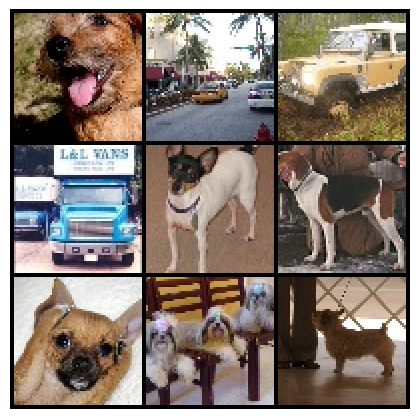

In [10]:
import random
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid

indices = random.sample(range(len(combinedDataset)), 9)

images = []
labels = []
for idx in indices:
    image, label = combinedDataset[idx]
    images.append(transform(image)) 
    labels.append(label)

images_tensor = torch.stack(images)

grid_img = make_grid(images_tensor, nrow=3, padding=2)

plt.figure(figsize=(4, 4))
plt.imshow(grid_img.permute(1, 2, 0))  
plt.axis('off')  
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()


{'dogs': 10000, 'food': 10000, 'vehicles': 10000}


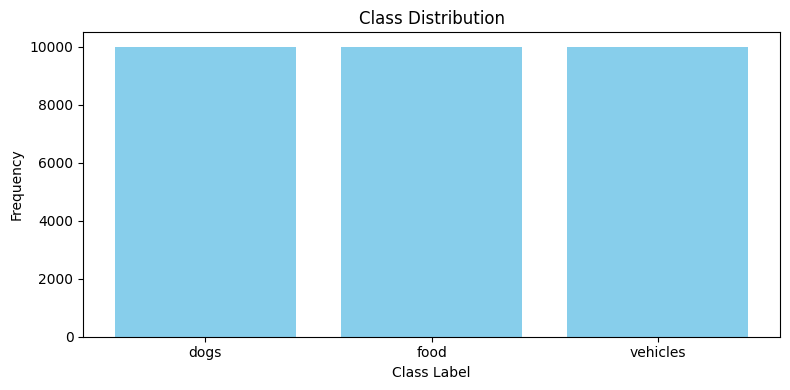

In [11]:
def classCounts(dataset):
    class_counts = {cls: 0 for cls in dataset.classes}
    for _, label in dataset:
        class_counts[dataset.classes[label]] += 1
        # print(class_counts)
    return class_counts

class_counts = classCounts(combinedDataset)
print(class_counts)

plt.figure(figsize=(8, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution')
# plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()


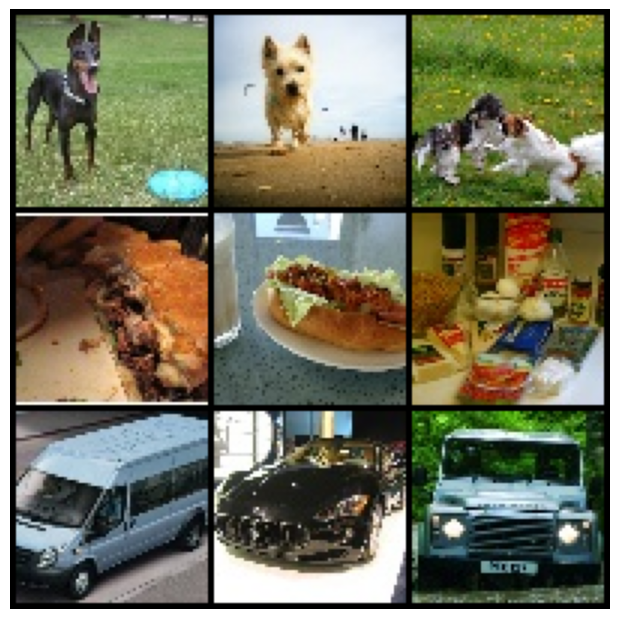

In [12]:
images = []
labels = []

for classIndex, class_name in enumerate(class_counts):
    # print(classIndex,class_name)
    sampleIndixces = [i for i, label in enumerate(combinedDataset.targets) if label == classIndex]
    
    # Randomly select 3 indices from the class
    samples = random.sample(sampleIndixces, 3)
    
    # Collect the images and labels
    for idx in samples:
        image, label = combinedDataset[idx]
        images.append(transform(image))  # Apply transformation to convert to tensor
        labels.append(label)

# Stack images into a single tensor
images_tensor = torch.stack(images)
grid_img = make_grid(images_tensor, nrow=3, padding=2)

plt.figure(figsize=(6, 6))
plt.imshow(grid_img.permute(1, 2, 0))  # Convert the image from (C, H, W) to (H, W, C)
plt.axis('off')  # Hide axis labels and ticks
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove any padding or borders
plt.show()


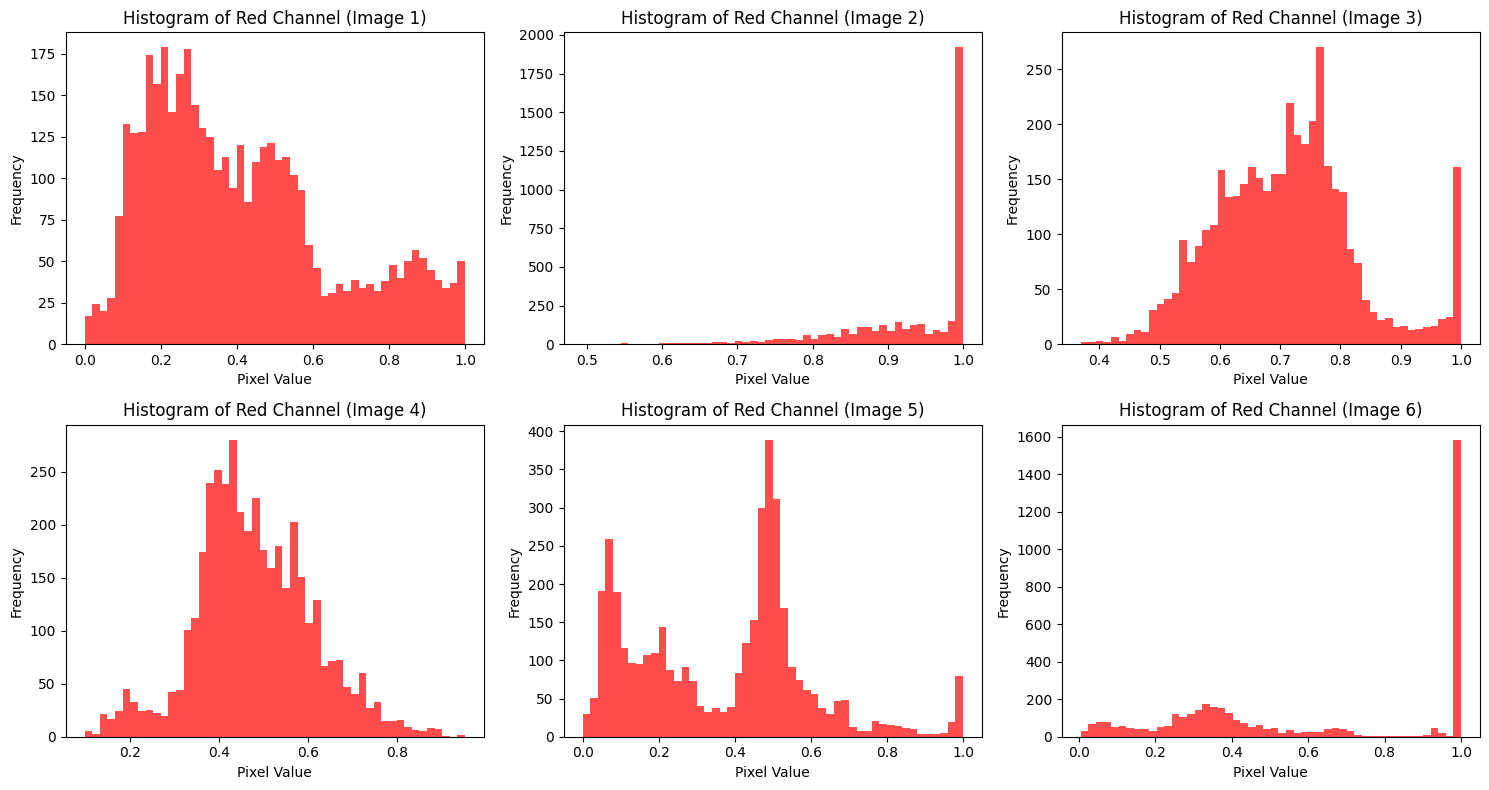

In [13]:
sampleImages = random.sample(range(len(combinedDataset)), 6)
plt.figure(figsize=(15, 8))
for i, j in enumerate(sampleImages):
    image, label = combinedDataset[j]  
    imgtensor = transform(image) 

    # pixel values for Red channel
    channelRed = imgtensor[0].numpy().flatten() 
    # green_channel = imgtensor[0].numpy().flatten()
    plt.subplot(2, 3, i + 1)
    plt.hist(channelRed, bins=50, color='red', alpha=0.7)
    plt.title(f'Histogram of Red Channel (Image {i+1})')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


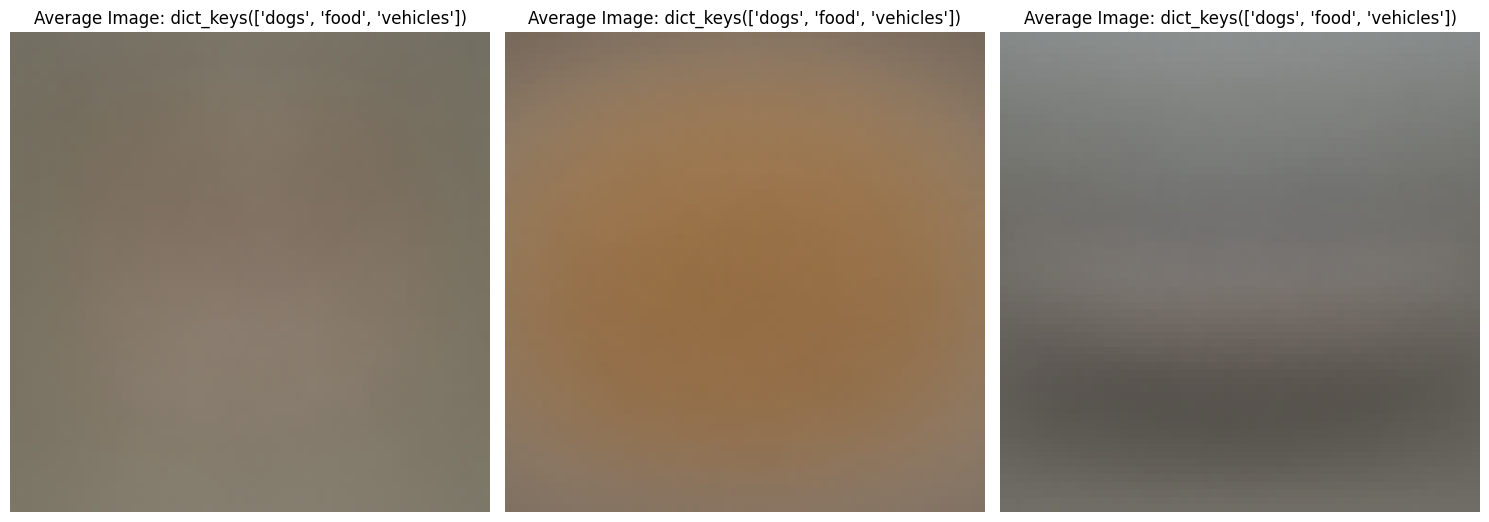

In [14]:
plt.figure(figsize=(15, 10))

for classIndex, class_name in enumerate(class_counts.keys()):
    indices = [i for i, label in enumerate(combinedDataset.targets) if label == classIndex]
    classSum = None
    imagesperClass = len(indices)
    for idx in indices:
        image, label = combinedDataset[idx]
        imgTensor = transform(image)  
        if classSum is None:
            classSum = imgTensor
        else:
            classSum += imgTensor
    avgimage = classSum / imagesperClass

    plt.subplot(1, 3, classIndex + 1)  
    plt.imshow(avgimage.permute(1, 2, 0))  
    plt.title(f'Average Image: {class_counts.keys()}')
    plt.axis('off')  
plt.tight_layout()  
plt.show()


# preprocessing

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


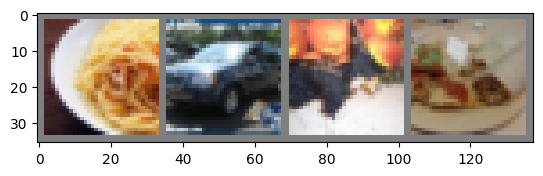

In [16]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import numpy as np
transform = transforms.Compose([
    transforms.Resize((32,32)), 
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
transformData = datasets.ImageFolder(root=dataset_path,transform=transform)

indices = list(range(len(transformData)))  

# 70% train, 15% validation, 15% test 
trainIndices, tempIndices = train_test_split(indices, test_size=0.3, stratify=transformData.targets, random_state=42)
valIndices, testIndices = train_test_split(tempIndices, test_size=0.5, stratify=[transformData.targets[i] for i in tempIndices], random_state=42)

trainData = Subset(transformData, trainIndices)
valData = Subset(transformData, valIndices)
testData = Subset(transformData, testIndices)

batchsize = 64
trainLoader = DataLoader(trainData, batch_size=batchsize, shuffle=True)
valLoader = DataLoader(valData, batch_size=batchsize, shuffle=False)
testLoader = DataLoader(testData, batch_size=batchsize, shuffle=False)



def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainLoader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))


In [17]:
device = torch.device(
    'cuda' if torch.cuda.is_available() else
    'mps' if torch.backends.mps.is_available() else
    'cpu'
)
device

device(type='cuda')

# VGG

In [54]:
import torch
import torch.nn as nn

class VGG16(nn.Module):
    def __init__(self, num_classes=3, dropout_rate=0.5, input_size=(32, 32)): 
        super(VGG16, self).__init__()

        self.input_size = input_size 

        # conv1
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        #conv2
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # conv3
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # conv4
        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        # conv5
        self.conv5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        
        self.fc1 = nn.Linear(8192, 4096) 
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)


        self.dropout = nn.Dropout(p=dropout_rate)
        
    def forward(self, x):
        x = self.conv1(x).to(device)
        x = self.conv2(x).to(device)
        x = self.conv3(x).to(device)
        x = self.conv4(x).to(device)
        x = self.conv5(x).to(device)

       
        x = x.view(x.size(0), -1)

        
        x = self.fc1(x).to(device)
        x = nn.ReLU(inplace=True)(x).to(device)
        x = self.dropout(x).to(device)  
        x = self.fc2(x).to(device)
        x = nn.ReLU(inplace=True)(x).to(device)
        x = self.dropout(x).to(device) 
        x = self.fc3(x).to(device)

        return x


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

def train_model(model, train_loader, num_epochs=3, criterion=None, optimizer=None, scheduler=None, device=None):
    TrainLoss = []
    TrainAcc = []
    model.train().to(device)

    device = device
    model.to(device)

    criterion = criterion or nn.CrossEntropyLoss()
    optimizer = optimizer or optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        StartTime = time.time()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)

            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            endTime = time.time()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = (correct / total) * 100
        TrainLoss.append(epoch_loss)
        TrainAcc.append(epoch_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.2f}, Accuracy: {epoch_acc:.2f}%, Epoch training time: {endTime - StartTime:.2f} seconds')
        if scheduler:
            scheduler.step()

    return model,TrainLoss,TrainAcc


In [56]:
def initialize_weights(model, init_type='xavier'):
    if init_type == 'xavier':
        for m in model.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    elif init_type == 'he':
        for m in model.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
    
    elif init_type == 'lecun':
        for m in model.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='linear')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
    
    elif init_type == 'normal':
        for m in model.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0, std=0.01)  
                if m.bias is not None:
                    nn.init.zeros_(m.bias)


## training base VGG model

In [65]:
base_modelVgg = VGG16(num_classes=3).to(device)
optimizer = optim.Adam(base_modelVgg.parameters(), lr=0.001)
trained_modelbase, train_lossbase, train_accbase = train_model(base_modelVgg, trainLoader, num_epochs=10, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, scheduler=None, device=device)


Epoch [1/10], Loss: 0.76, Accuracy: 64.37%, Epoch training time: 32.35 seconds
Epoch [2/10], Loss: 0.44, Accuracy: 83.58%, Epoch training time: 31.62 seconds
Epoch [3/10], Loss: 0.35, Accuracy: 87.57%, Epoch training time: 32.16 seconds
Epoch [4/10], Loss: 0.40, Accuracy: 86.00%, Epoch training time: 32.27 seconds
Epoch [5/10], Loss: 0.34, Accuracy: 87.54%, Epoch training time: 31.97 seconds
Epoch [6/10], Loss: 0.30, Accuracy: 89.07%, Epoch training time: 32.53 seconds
Epoch [7/10], Loss: 0.28, Accuracy: 90.07%, Epoch training time: 31.56 seconds
Epoch [8/10], Loss: 0.26, Accuracy: 91.26%, Epoch training time: 32.89 seconds
Epoch [9/10], Loss: 0.24, Accuracy: 91.30%, Epoch training time: 31.62 seconds
Epoch [10/10], Loss: 0.26, Accuracy: 90.81%, Epoch training time: 32.30 seconds


## testing base vgg model

Test Loss: 0.3777, Test Accuracy: 0.8704
Precision: 0.8731, Recall: 0.8704, F1 Score: 0.8711


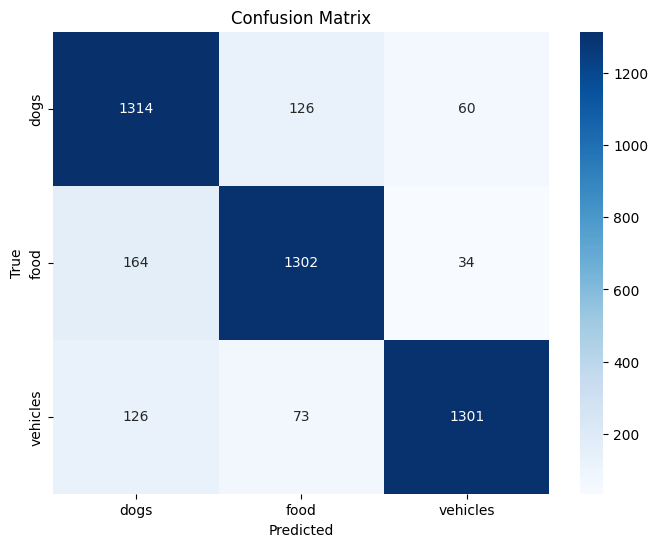

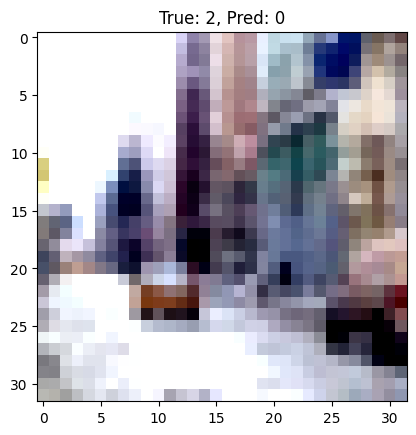

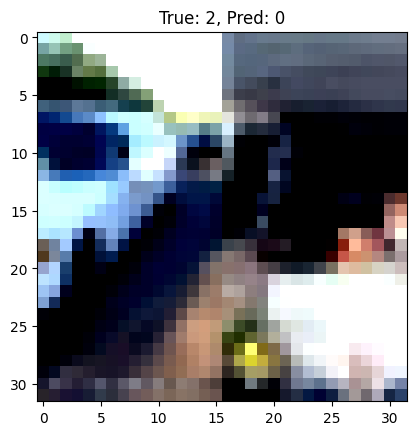

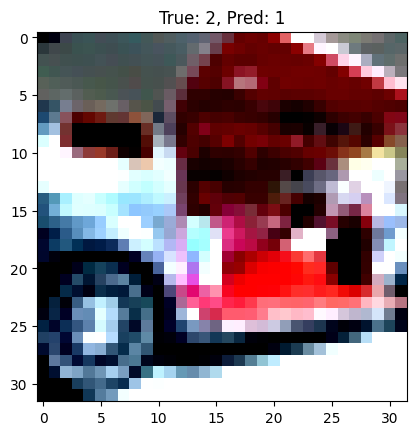

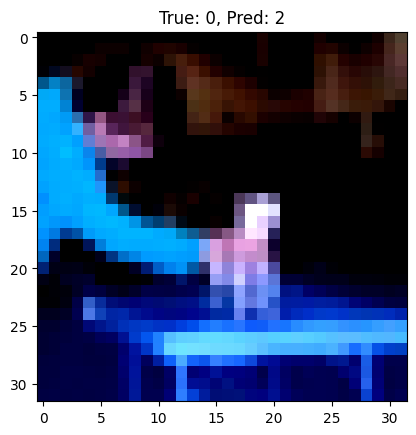

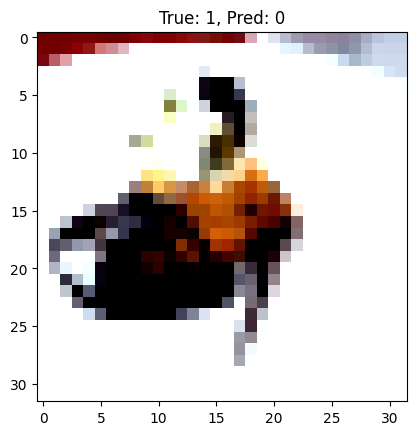

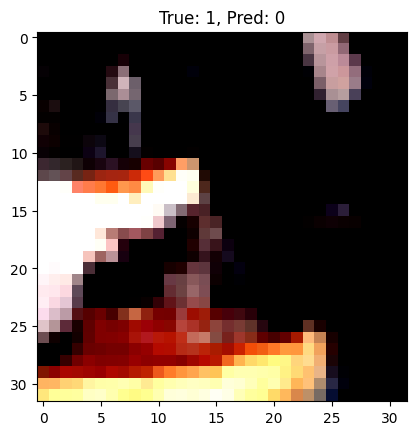

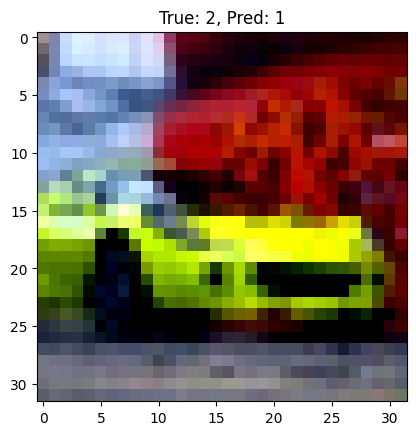

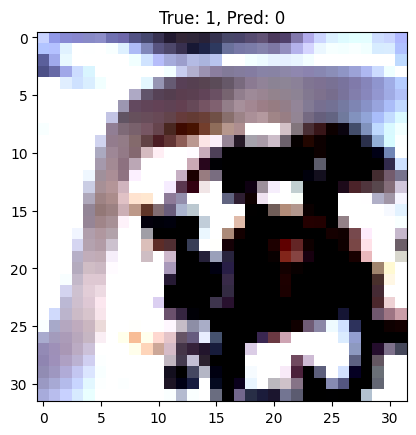

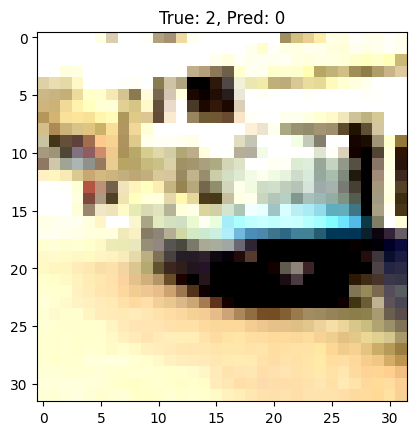

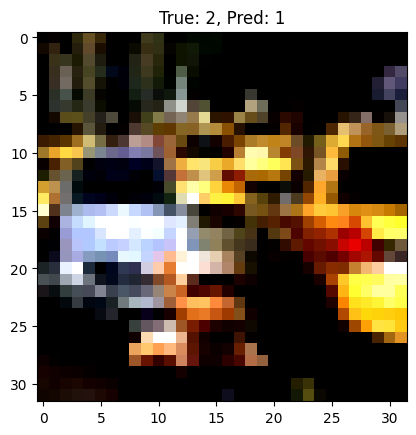

In [73]:
testLossBaseodel, testAccuracyBaseodel = test_model(base_modelVgg, testLoader, nn.CrossEntropyLoss(), device,class_names )


In [81]:
## weights initialization

## weights initialization

In [57]:
model = VGG16(num_classes=3).to(device)

# Initializing different weight initializations
initializations = ['xavier', 'he', 'lecun', 'normal']

for initializationType in initializations:
    print(f"\nInitializing model with {initializationType} initialization")
    initialize_weights(model, initializationType) 

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

    trained_model, train_loss, train_acc = train_model(model, trainLoader, num_epochs=3, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, scheduler=scheduler, device=device)

    print(f"Finished training with {initializationType} initialization")



Initializing model with xavier initialization
Epoch [1/3], Loss: 1.12, Accuracy: 33.28%, Epoch training time: 32.22 seconds
Epoch [2/3], Loss: 1.10, Accuracy: 32.93%, Epoch training time: 32.25 seconds
Epoch [3/3], Loss: 1.10, Accuracy: 33.42%, Epoch training time: 32.93 seconds
Finished training with xavier initialization

Initializing model with he initialization
Epoch [1/3], Loss: 4.16, Accuracy: 33.95%, Epoch training time: 32.28 seconds
Epoch [2/3], Loss: 1.10, Accuracy: 32.80%, Epoch training time: 32.67 seconds
Epoch [3/3], Loss: 1.10, Accuracy: 33.38%, Epoch training time: 31.93 seconds
Finished training with he initialization

Initializing model with lecun initialization
Epoch [1/3], Loss: 0.87, Accuracy: 56.06%, Epoch training time: 32.78 seconds
Epoch [2/3], Loss: 0.51, Accuracy: 79.79%, Epoch training time: 31.59 seconds
Epoch [3/3], Loss: 0.41, Accuracy: 84.90%, Epoch training time: 32.73 seconds
Finished training with lecun initialization

Initializing model with normal 

## optimizers with xavier init

In [60]:
modelop = VGG16(num_classes=3).to(device)
print(device)
initializations = (modelop, 'xavier')
resultsXavierNorm = []

# Optimizers to experiment with
optimizers = {
    'SGD': optim.SGD(modelop.parameters(), lr=0.001, momentum=0.9, weight_decay=0.005),
    'Adam': optim.Adam(modelop.parameters(), lr=0.001),
    'AdamW': optim.AdamW(modelop.parameters(), lr=0.001, weight_decay=0.01),
    'RMSprop': optim.RMSprop(modelop.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0.01)
}

for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with {optimizer_name} optimizer")
    
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
    
    trained_model, train_loss, train_acc = train_model(modelop, trainLoader, num_epochs=5, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
    resultsXavierNorm.append({
        'initializer': 'xavier',
        'optimizer': optimizer_name,
        'train_loss': train_loss,
        'train_accuracy': train_acc
    })

# for result in results:
    # print(f"{result['optimizer']} -> Training Loss: {result['train_loss']}, Training Accuracy: {result['train_accuracy']}")


cuda

Training with SGD optimizer
Epoch [1/5], Loss: 1.10, Accuracy: 33.00%, Epoch training time: 30.82 seconds
Epoch [2/5], Loss: 1.10, Accuracy: 32.97%, Epoch training time: 31.79 seconds
Epoch [3/5], Loss: 1.10, Accuracy: 33.00%, Epoch training time: 31.03 seconds
Epoch [4/5], Loss: 1.10, Accuracy: 33.64%, Epoch training time: 31.38 seconds
Epoch [5/5], Loss: 1.10, Accuracy: 33.61%, Epoch training time: 30.76 seconds

Training with Adam optimizer
Epoch [1/5], Loss: 0.77, Accuracy: 64.05%, Epoch training time: 33.17 seconds
Epoch [2/5], Loss: 0.45, Accuracy: 83.65%, Epoch training time: 31.85 seconds
Epoch [3/5], Loss: 0.38, Accuracy: 86.62%, Epoch training time: 32.87 seconds
Epoch [4/5], Loss: 0.27, Accuracy: 90.45%, Epoch training time: 32.15 seconds
Epoch [5/5], Loss: 0.25, Accuracy: 91.11%, Epoch training time: 32.50 seconds

Training with AdamW optimizer
Epoch [1/5], Loss: 0.32, Accuracy: 88.68%, Epoch training time: 32.56 seconds
Epoch [2/5], Loss: 0.35, Accuracy: 87.04%, Epoc

## optimizers with normal init

In [61]:
modelop = VGG16(num_classes=3).to(device)
print(device)
initializations = (modelop, 'normal')
# resultsNorm = []

# Optimizers to experiment with
optimizers = {
    'Adam': optim.Adam(modelop.parameters(), lr=0.001),
    'AdamW': optim.AdamW(modelop.parameters(), lr=0.001, weight_decay=0.01),
}

for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with {optimizer_name} optimizer")
    
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
    
    trained_model, train_loss, train_acc = train_model(modelop, trainLoader, num_epochs=5, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
    resultsXavierNorm.append({
        'initializer': 'normal',
        'optimizer': optimizer_name,
        'train_loss': train_loss,
        'train_accuracy': train_acc
    })

# for result in results:
    # print(f"{result['optimizer']} -> Training Loss: {result['train_loss']}, Training Accuracy: {result['train_accuracy']}")


cuda

Training with Adam optimizer
Epoch [1/5], Loss: 0.74, Accuracy: 67.25%, Epoch training time: 33.15 seconds
Epoch [2/5], Loss: 0.44, Accuracy: 83.86%, Epoch training time: 32.25 seconds
Epoch [3/5], Loss: 0.39, Accuracy: 85.86%, Epoch training time: 32.57 seconds
Epoch [4/5], Loss: 0.27, Accuracy: 90.34%, Epoch training time: 32.51 seconds
Epoch [5/5], Loss: 0.25, Accuracy: 91.03%, Epoch training time: 32.20 seconds

Training with AdamW optimizer
Epoch [1/5], Loss: 0.32, Accuracy: 88.74%, Epoch training time: 33.59 seconds
Epoch [2/5], Loss: 0.29, Accuracy: 89.88%, Epoch training time: 31.95 seconds
Epoch [3/5], Loss: 0.27, Accuracy: 90.79%, Epoch training time: 33.40 seconds
Epoch [4/5], Loss: 0.18, Accuracy: 93.71%, Epoch training time: 31.91 seconds
Epoch [5/5], Loss: 0.16, Accuracy: 94.60%, Epoch training time: 32.16 seconds


## Comparing results of optimizers with different inits

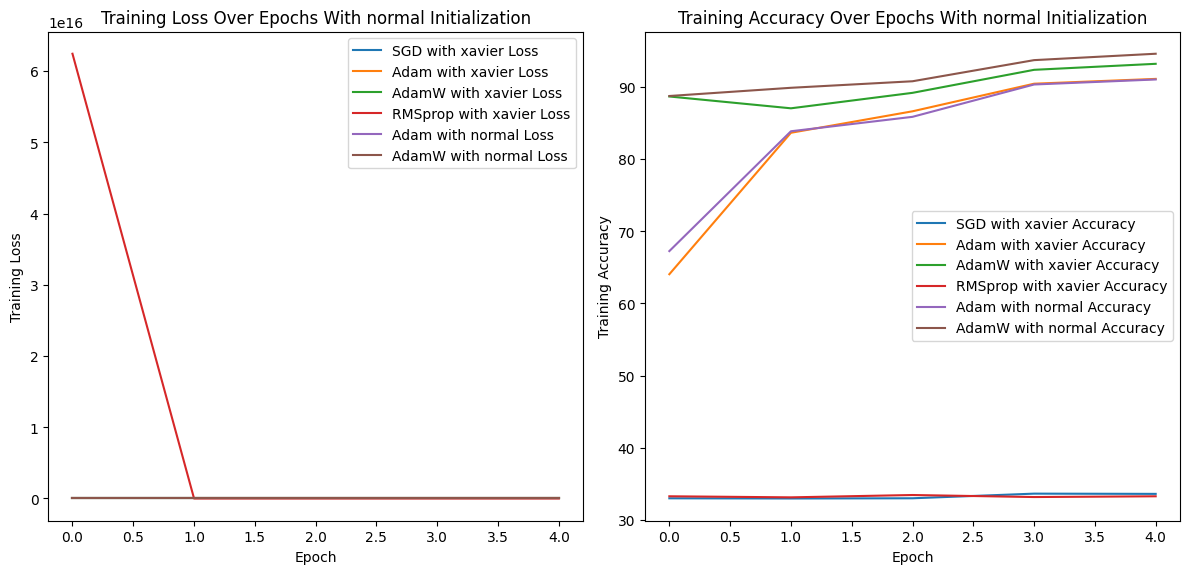

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for result in resultsXavierNorm:
    plt.plot(result['train_loss'], label=f"{result['optimizer']} with {result['initializer']} Loss")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title(f"Training Loss Over Epochs With {result['initializer']} Initialization")
plt.legend()

plt.subplot(1, 2, 2)
for result in resultsXavierNorm:
    plt.plot(result['train_accuracy'], label=f"{result['optimizer']} with {result['initializer']} Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title(f"Training Accuracy Over Epochs With {result['initializer']} Initialization")
plt.legend()

plt.tight_layout()
plt.show()


### from the experiment above we can conclude that Normal  Weight Initilization works the best for our network given the dataset
### thus we'll move forward with this Initilization technique

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# for result in resultsXavierNorm:
#     plt.plot(result['train_loss'], label=f"{result['optimizer']} Loss")
# plt.xlabel('Epoch')
# plt.ylabel('Training Loss')
# plt.title('Training Loss Over Epochs With Normal Initialization')
# plt.legend()

# plt.subplot(1, 2, 2)
# for result in resultsXavierNorm:
#     plt.plot(result['train_accuracy'], label=f"{result['optimizer']} Accuracy")
# plt.xlabel('Epoch')
# plt.ylabel('Training Accuracy')
# plt.title('Training Accuracy Over Epochs Normal Initialization')
# plt.legend()

# plt.tight_layout()
# plt.show()


## batch sizes

In [67]:
batchsize = 32
trainLoader32 = DataLoader(trainData, batch_size=batchsize, shuffle=True)

batchsize = 64
trainLoader64 = DataLoader(trainData, batch_size=batchsize, shuffle=True)

In [68]:
modelBatch= VGG16(num_classes=3).to(device)
initializations = (modelBatch, 'normal')
optimizer = optim.AdamW(modelBatch.parameters(), lr=0.001, weight_decay=0.01)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
StartTime32 = time.time()
trained_model32, train_loss32, train_acc32 = train_model(modelBatch, trainLoader32, num_epochs=10, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
endTime32 = time.time()
print(f'batch size 32 trained in: {endTime32 - StartTime32:.2f} seconds')

# print(batch size 32 trained in )
StartTime64 = time.time()
trained_model64, train_loss64, train_acc64 = train_model(modelBatch, trainLoader64, num_epochs=10, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
endTime64 = time.time()
print(f'batch size 64 trained in: {endTime64 - StartTime64:.2f} seconds')


Epoch [1/10], Loss: 0.75, Accuracy: 66.90%, Epoch training time: 37.29 seconds
Epoch [2/10], Loss: 0.52, Accuracy: 81.46%, Epoch training time: 37.17 seconds
Epoch [3/10], Loss: 0.45, Accuracy: 84.19%, Epoch training time: 37.89 seconds
Epoch [4/10], Loss: 0.31, Accuracy: 88.89%, Epoch training time: 37.64 seconds
Epoch [5/10], Loss: 0.28, Accuracy: 89.76%, Epoch training time: 36.52 seconds
Epoch [6/10], Loss: 0.27, Accuracy: 90.31%, Epoch training time: 37.26 seconds
Epoch [7/10], Loss: 0.25, Accuracy: 90.91%, Epoch training time: 37.28 seconds
Epoch [8/10], Loss: 0.25, Accuracy: 91.03%, Epoch training time: 37.22 seconds
Epoch [9/10], Loss: 0.25, Accuracy: 91.22%, Epoch training time: 37.66 seconds
Epoch [10/10], Loss: 0.24, Accuracy: 91.29%, Epoch training time: 37.00 seconds
batch size 32 trained in: 372.94 seconds
Epoch [1/10], Loss: 0.24, Accuracy: 91.29%, Epoch training time: 32.90 seconds
Epoch [2/10], Loss: 0.24, Accuracy: 91.22%, Epoch training time: 33.13 seconds
Epoch [3/1

## data preparation, data augmentation

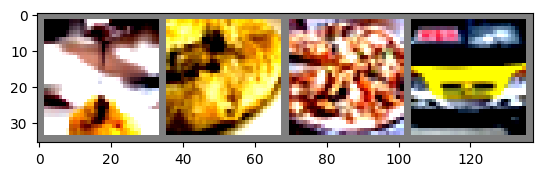

In [20]:
traintransform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

evaltransforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


trainData.dataset.transform = traintransform
valData.dataset.transform = evaltransforms
testData.dataset.transform = evaltransforms


batchsize = 64
trainLoaderFinalSet = DataLoader(trainData, batch_size=batchsize, shuffle=True)
valLoaderFinalSet = DataLoader(valData, batch_size=batchsize, shuffle=False)
testLoaderFinalSet = DataLoader(testData, batch_size=batchsize, shuffle=False)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainLoaderFinalSet)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))

In [21]:

def trainBestModel(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience=3, device="cpu"):
    print(device)
    bestLoss = float('inf')
    earlyStopEpoch = 0
    trainLosses = []
    valLosses = []
    trainAccuracies = []
    valAccuracies = []
    
    for epoch in range(num_epochs):
        model.to(device)
        model.train()  
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()  
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        avgTrainLoss = running_loss / len(train_loader)
        train_accuracy = correct / total
        
        model.eval() 
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avgValLoss = val_loss / len(val_loader)
        val_accuracy = correct / total
        writelogs.add_scalar('Training Loss', avgTrainLoss, epoch)
        writelogs.add_scalar('Validation Loss', avgValLoss, epoch)
        writelogs.add_scalar('Training Accuracy', train_accuracy, epoch)
        writelogs.add_scalar('Validation Accuracy', val_accuracy, epoch)

        trainLosses.append(avgTrainLoss)
        valLosses.append(avgValLoss)
        trainAccuracies.append(train_accuracy)
        valAccuracies.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {avgTrainLoss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {avgValLoss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        scheduler.step()

        # Early stopping
        if avgValLoss < bestLoss:
            bestLoss = avgValLoss
            earlyStopEpoch = 0  
            print(f"saving model at epoch {epoch+1}")
            torch.save(model.state_dict(), 'best_model_vgg.pth')  
        else:
            earlyStopEpoch += 1

        if earlyStopEpoch >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    return model, trainLosses, valLosses, trainAccuracies, valAccuracies


In [22]:
def evaluate_model(model, val_loader, criterion, device="cpu"):
    device = device
    print(device)
    model.eval().to(device)
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avgValLoss = val_loss / len(val_loader)
    val_accuracy = correct / total
    
    return avgValLoss, val_accuracy


## logs for vgg

In [70]:
import os
import tensorflow as tf
from torch.utils.tensorboard import SummaryWriter
# writelogs = SummaryWriter('runs/part1_vgglogs')

logDir = '/kaggle/working/tensorboard_logs/part1_vgglogsFinal/'

if os.path.exists(logDir):
    import shutil
    print("Logs removed and new ones will be written.")
    shutil.rmtree(logDir)
os.makedirs(logDir, exist_ok=True)
writelogs = SummaryWriter(logDir)


Logs removed and new ones will be written.


## vgg best model training with L2 regularization using weight_decay in optimizer, early dropping, scheduler, batch size 64 and normal weight init

In [71]:
modelFinal= VGG16(num_classes=3).to(device)
initializations = (modelFinal, 'normal')
optimizer = optim.AdamW(modelFinal.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

# trained_model64, train_loss64, train_acc64 = train_model(modelBatch, trainLoader64, num_epochs=10, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
# endTime64 = time.time()
# print(f'batch size 64 trained in: {endTime64 - StartTime64:.2f} seconds')

bestModel, trainLossesBest, valLossesBest, trainAccuraciesBest, valAccuraciesBest= trainBestModel(modelFinal, trainLoaderFinalSet, valLoaderFinalSet, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, scheduler=scheduler, num_epochs = 30, patience=3, device=device)

cuda
Epoch [1/30], Train Loss: 0.7903, Train Accuracy: 0.6155, Val Loss: 0.4922, Val Accuracy: 0.8024
saving model at epoch 1
Epoch [2/30], Train Loss: 0.4491, Train Accuracy: 0.8274, Val Loss: 0.3912, Val Accuracy: 0.8469
saving model at epoch 2
Epoch [3/30], Train Loss: 0.3689, Train Accuracy: 0.8598, Val Loss: 0.3381, Val Accuracy: 0.8669
saving model at epoch 3
Epoch [4/30], Train Loss: 0.3032, Train Accuracy: 0.8845, Val Loss: 0.3187, Val Accuracy: 0.8760
saving model at epoch 4
Epoch [5/30], Train Loss: 0.2907, Train Accuracy: 0.8912, Val Loss: 0.3098, Val Accuracy: 0.8800
saving model at epoch 5
Epoch [6/30], Train Loss: 0.2820, Train Accuracy: 0.8948, Val Loss: 0.3082, Val Accuracy: 0.8818
saving model at epoch 6
Epoch [7/30], Train Loss: 0.2706, Train Accuracy: 0.9009, Val Loss: 0.3051, Val Accuracy: 0.8816
saving model at epoch 7
Epoch [8/30], Train Loss: 0.2682, Train Accuracy: 0.9017, Val Loss: 0.3042, Val Accuracy: 0.8833
saving model at epoch 8
Epoch [9/30], Train Loss: 0

In [72]:
writelogs.close()

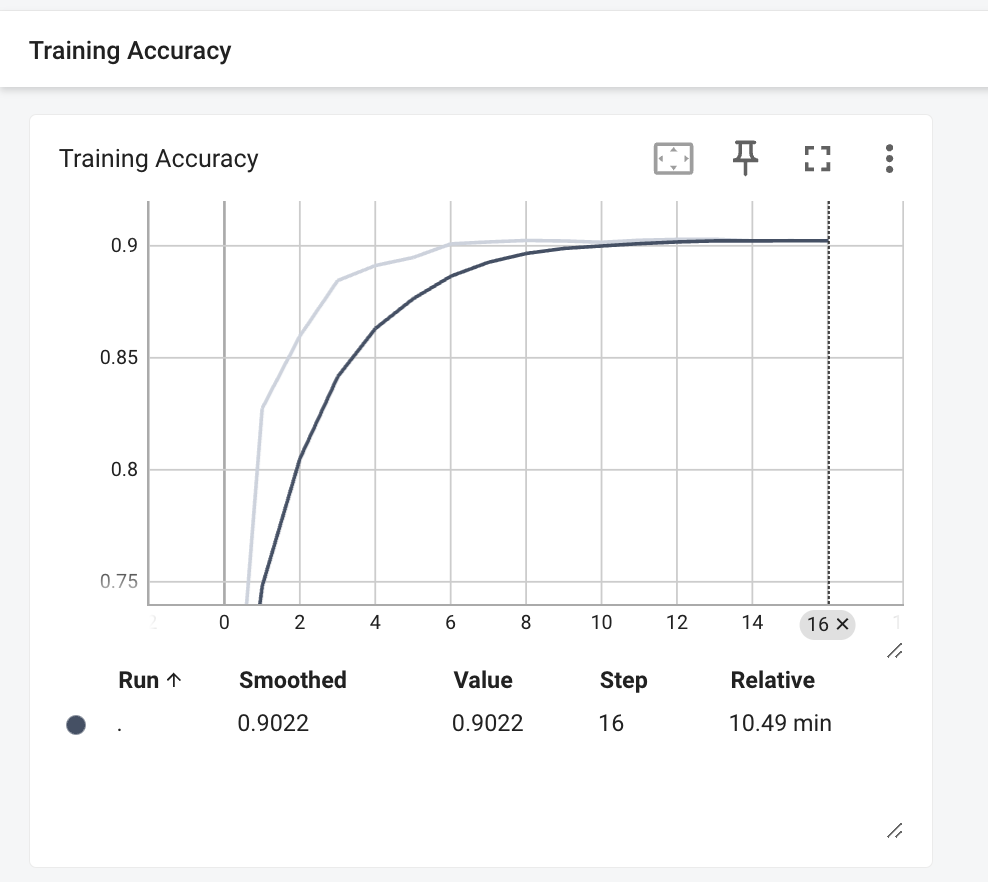
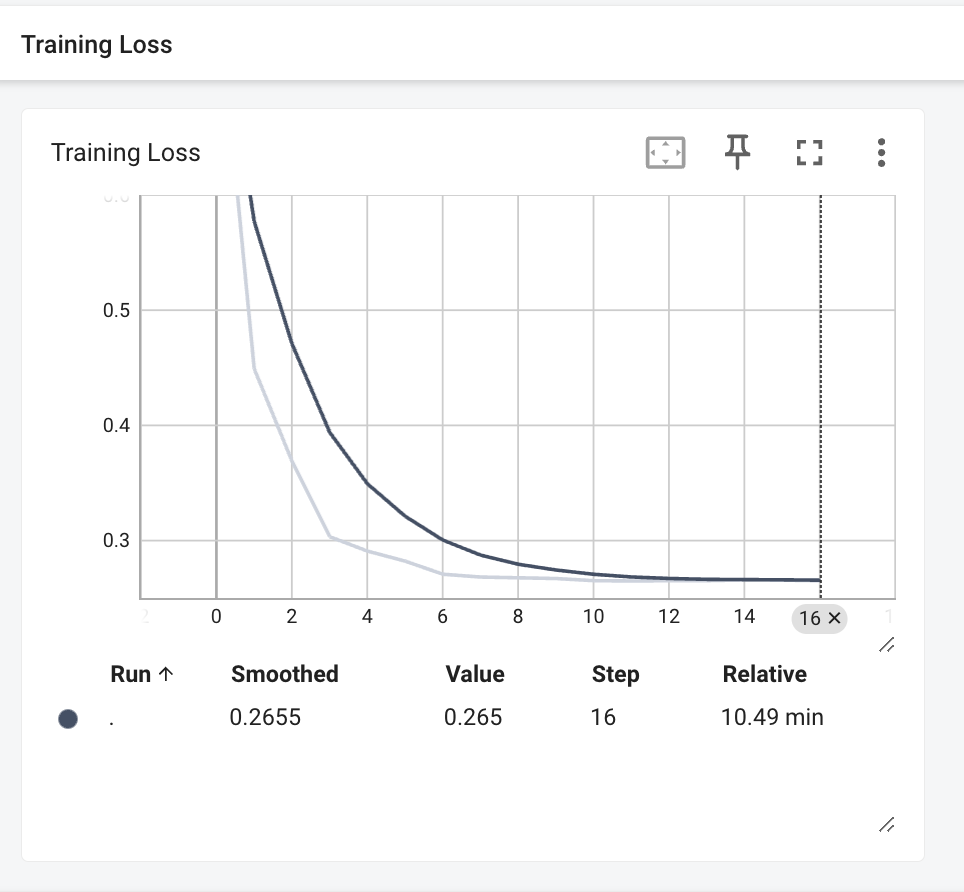
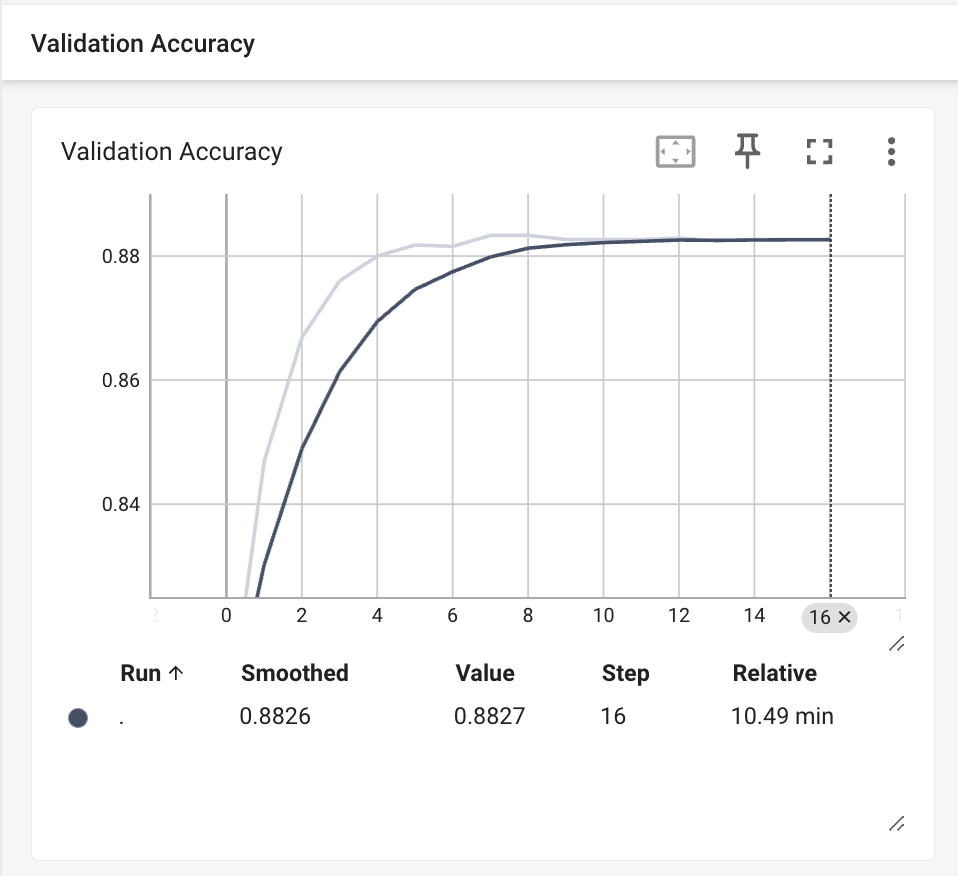
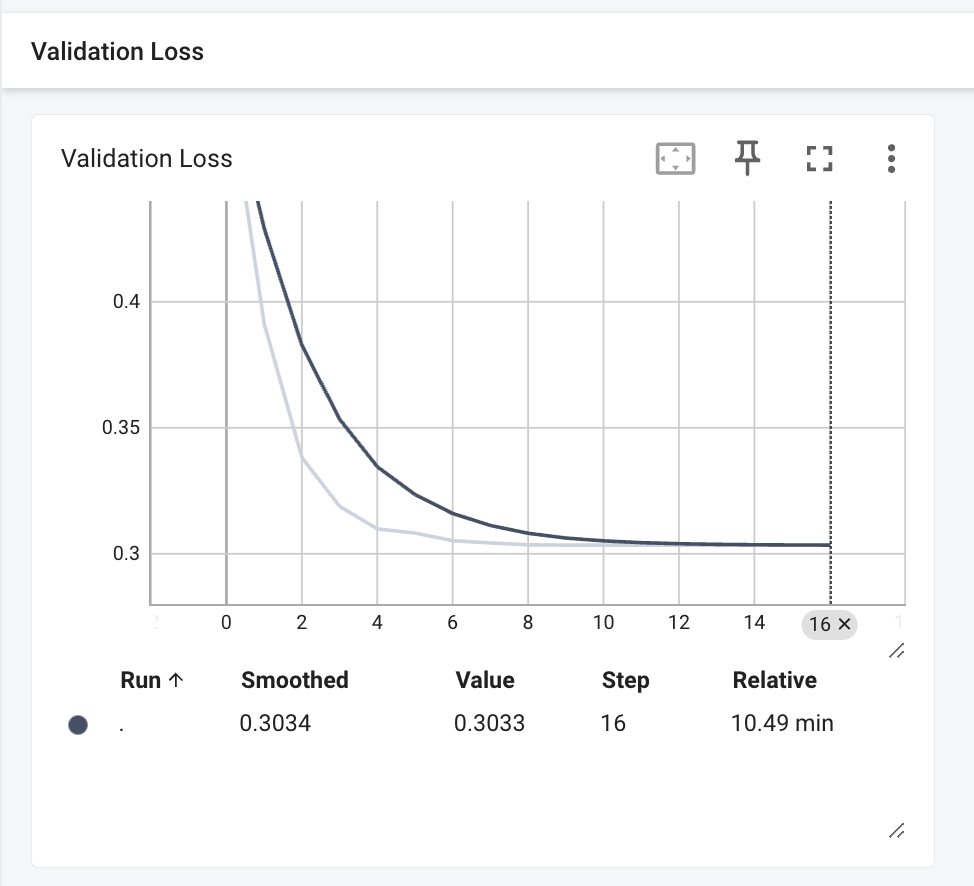

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

def displayImages(test_loader, all_labels, all_preds, imagesNum=10):
    misId = [i for i, (true, pred) in enumerate(zip(all_labels, all_preds)) if true != pred]
    misclassifiedImages = [test_loader.dataset[i][0] for i in misId]
    misclassifiedLabels = [all_labels[i] for i in misId]
    misclassifiedPreds = [all_preds[i] for i in misId]
    for i in range(min(imagesNum, len(misclassifiedImages))): 
        img = misclassifiedImages[i]
        label = misclassifiedLabels[i]
        pred = misclassifiedPreds[i]
        img = img / 2 + 0.5  # Unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.title(f'True: {label}, Pred: {pred}')
        plt.show()

In [26]:
def confusionMatrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [29]:
def test_model(model, test_loader, criterion, device, class_names):
    model.to(device)
    model.eval().to(device)
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():  
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    testLoss = running_loss / len(test_loader)
    testAccuracy = correct / total
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

    print(f"Test Loss: {testLoss:.4f}, Test Accuracy: {testAccuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    confusionMatrix(all_labels, all_preds, class_names)

    displayImages(test_loader, all_labels, all_preds, imagesNum=10)

    return testLoss, testAccuracy
class_names = class_counts.keys()

## Best Model test

Test Loss: 0.2815, Test Accuracy: 0.8927
Precision: 0.8939, Recall: 0.8927, F1 Score: 0.8929


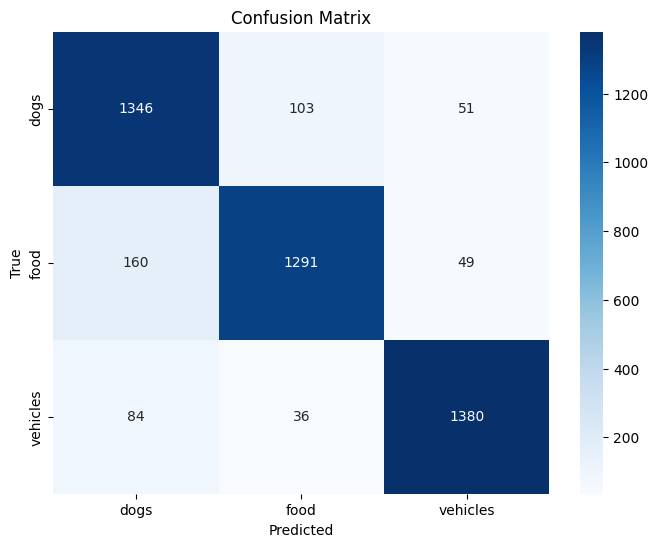

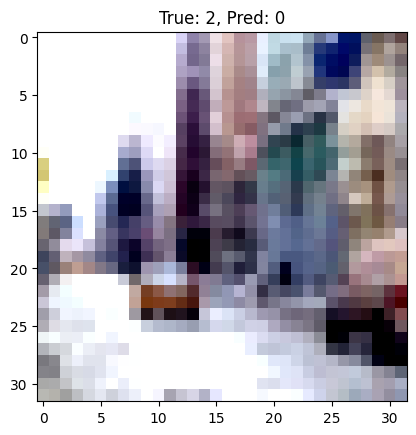

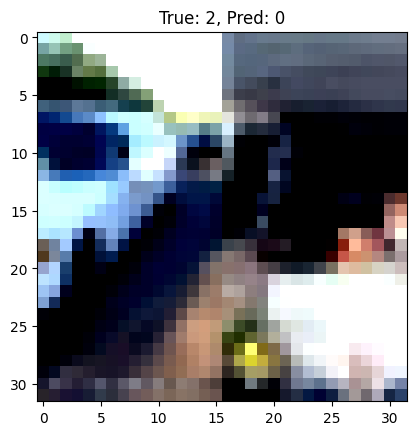

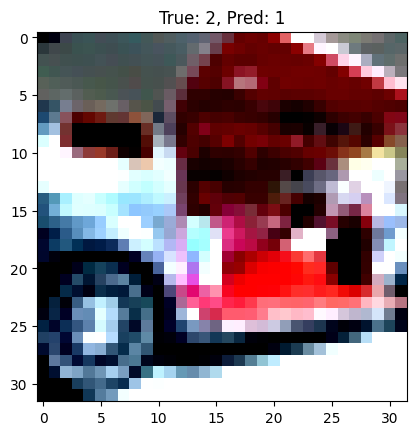

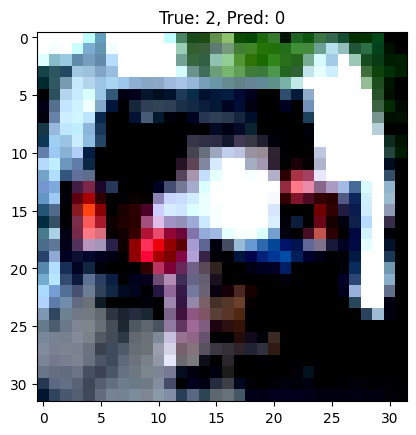

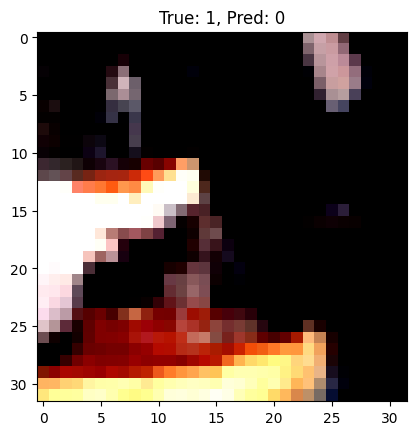

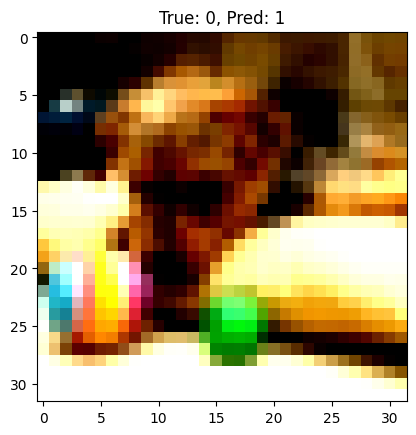

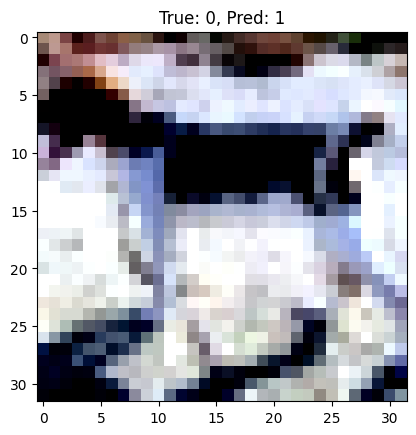

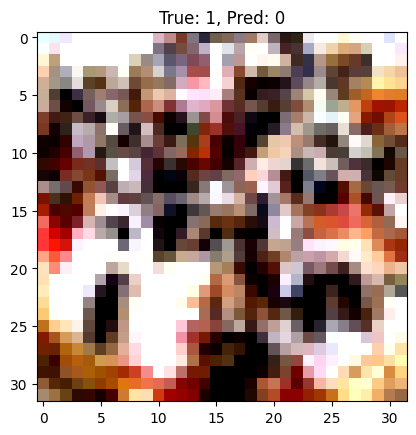

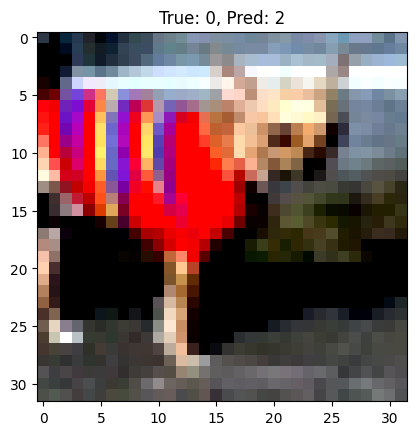

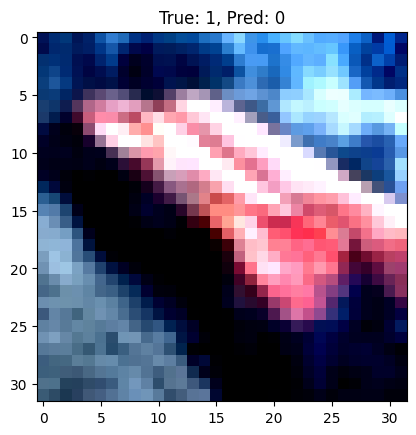

In [74]:
testLoss, testAccuracy = test_model(bestModel, testLoaderFinalSet, nn.CrossEntropyLoss(), device,class_names )


In [31]:
def plot_metrics(train_accuracies, val_accuracies,test_accuracies,train_losses,val_losses,test_losses):
    epochs = range(1, len(train_accuracies) + 1)
    test_accuracies= [test_accuracies] * len(train_accuracies)
    test_losses = [test_losses] * len(train_accuracies)
    print(test_losses)
    # accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_accuracies, label='Training Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.plot(epochs, test_accuracies, label='Test Accuracy')
    plt.title('Training Validation and Test Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.title('Training Validation and Test Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


[0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519, 0.2815066263289519]


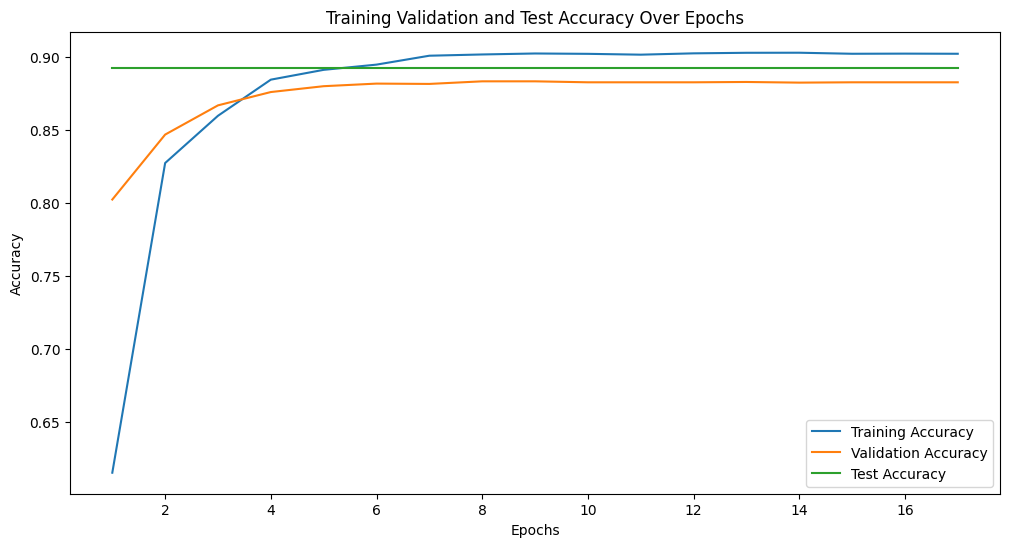

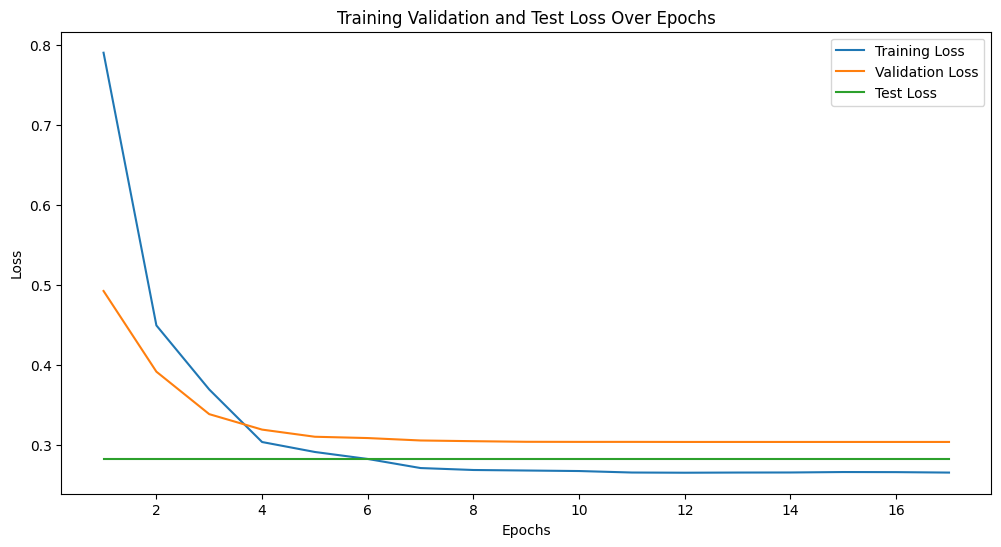

In [75]:
plot_metrics(trainAccuraciesBest, valAccuraciesBest,testAccuracy,trainLossesBest, valLossesBest,testLoss)

# RESNET

In [34]:
import torch
import torch.nn as nn

class ResnetResidual(nn.Module):
    def __init__(self, ip, op, stride=1, short=None):
        super(ResnetResidual, self).__init__()

        # cv1
        self.conv_layer1 = nn.Conv2d(ip, op, kernel_size=3, stride=stride, padding=1, bias=False)
        self.batch_norm1 = nn.BatchNorm2d(op)
        
        # cv2
        self.conv_layer2 = nn.Conv2d(op, op, kernel_size=3, stride=1, padding=1, bias=False)
        self.batch_norm2 = nn.BatchNorm2d(op)

        self.short = short
        self.activation = nn.ReLU(inplace=True)

    def forward(self, x):
        identity = x

        out = self.conv_layer1(x)
        out = self.batch_norm1(out)
        out = self.activation(out)

        out = self.conv_layer2(out)
        out = self.batch_norm2(out)

        if self.short:
            identity = self.short(x)

        out = torch.add(out, identity) 
        out = self.activation(out)

        return out


In [35]:
class ResNet(nn.Module):
    def __init__(self, classes=1000):
        super(ResNet, self).__init__()

        self.initial_conv = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.initial_bn = nn.BatchNorm2d(64)
        self.initial_relu = nn.ReLU(inplace=True)
        self.pooling = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.block1 = self.applyResnetResidual(64, 64, 2)
        self.block2 = self.applyResnetResidual(64, 128, 2, stride=2)
        self.block3 = self.applyResnetResidual(128, 256, 2, stride=2)
        self.block4 = self.applyResnetResidual(256, 512, 2, stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc_layer = nn.Linear(512, classes)

    def applyResnetResidual(self, ip, op, num_blocks, stride=1):
        short = None
        if stride != 1 or ip != op:
            short = nn.Sequential(
                nn.Conv2d(ip, op, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(op)
            )

        layers = []
        layers.append(ResnetResidual(ip, op, stride, short))
        for _ in range(1, num_blocks):
            layers.append(ResnetResidual(op, op))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.initial_conv(x)
        x = self.initial_bn(x)
        x = self.initial_relu(x)
        x = self.pooling(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)

        x = self.avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc_layer(x)

        return x


In [80]:
base_modelRes = ResNet(classes=3).to(device)
optimizer = optim.Adam(base_modelRes.parameters(), lr=0.001)
trained_modelbaseRes, train_lossbaseRes, train_accbaseRes = train_model(base_modelRes, trainLoader, num_epochs=10, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, scheduler=None, device=device)


Epoch [1/10], Loss: 0.48, Accuracy: 80.98%, Epoch training time: 40.35 seconds
Epoch [2/10], Loss: 0.37, Accuracy: 85.61%, Epoch training time: 30.02 seconds
Epoch [3/10], Loss: 0.33, Accuracy: 87.30%, Epoch training time: 28.58 seconds
Epoch [4/10], Loss: 0.30, Accuracy: 88.80%, Epoch training time: 29.53 seconds
Epoch [5/10], Loss: 0.27, Accuracy: 89.62%, Epoch training time: 28.55 seconds
Epoch [6/10], Loss: 0.25, Accuracy: 90.61%, Epoch training time: 29.38 seconds
Epoch [7/10], Loss: 0.23, Accuracy: 91.39%, Epoch training time: 28.48 seconds
Epoch [8/10], Loss: 0.21, Accuracy: 92.26%, Epoch training time: 29.62 seconds
Epoch [9/10], Loss: 0.19, Accuracy: 92.54%, Epoch training time: 28.49 seconds
Epoch [10/10], Loss: 0.16, Accuracy: 93.99%, Epoch training time: 29.32 seconds


Test Loss: 0.3641, Test Accuracy: 0.8804
Precision: 0.8891, Recall: 0.8804, F1 Score: 0.8809


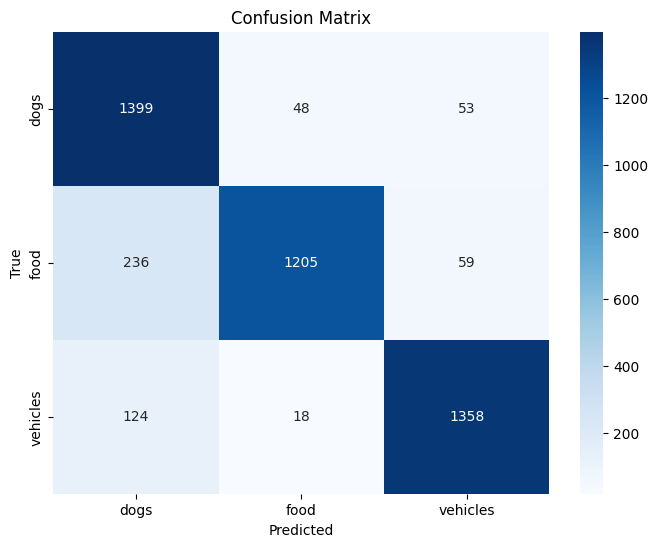

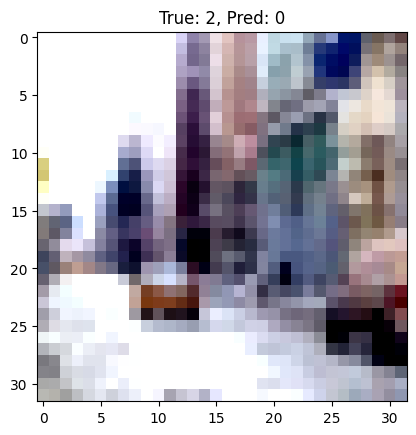

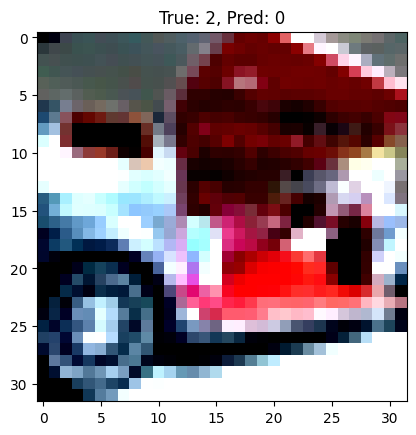

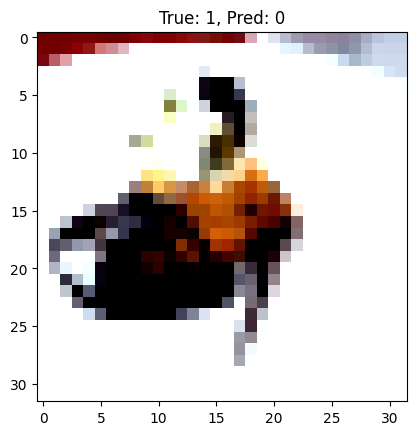

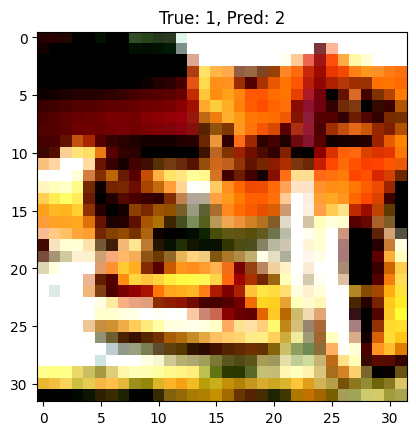

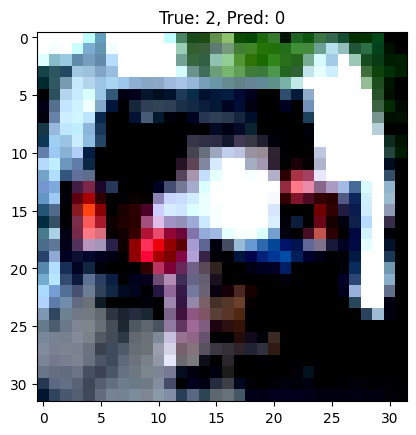

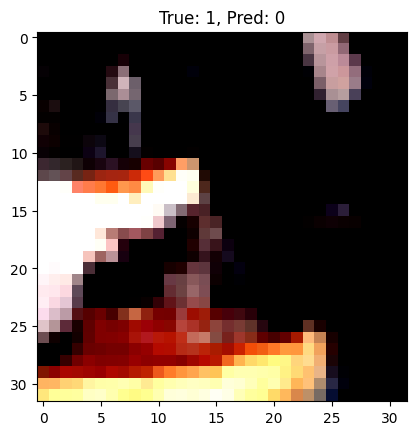

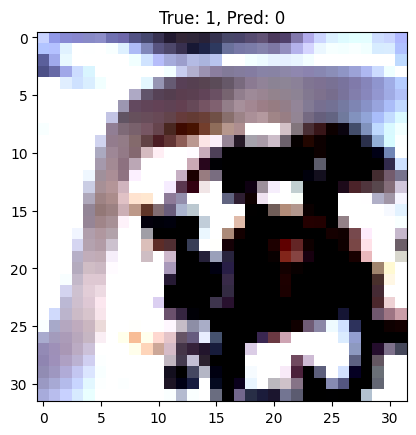

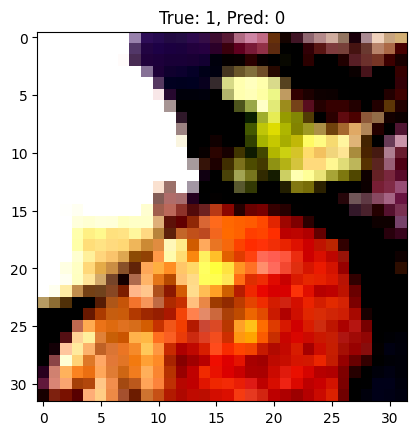

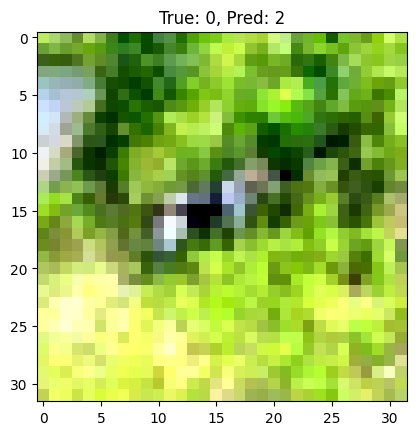

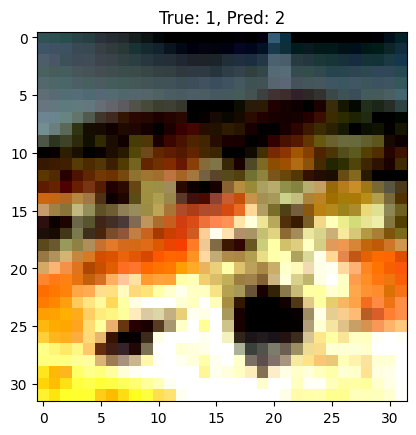

In [83]:
testLossBaseodelRes, testAccuracyBaseodelRes = test_model(base_modelRes, testLoader, nn.CrossEntropyLoss(), device,class_names )


## weights initialization

In [36]:
modelResWI = ResNet(classes=3).to(device)

# Initializing with different weight initializations
initializations = ['xavier', 'he', 'lecun', 'normal']

for initializationType in initializations:
    print(f"\nInitializing model with {initializationType} initialization")
    initialize_weights(modelResWI, initializationType) 

    optimizer = optim.Adam(modelResWI.parameters(), lr=0.001)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

    trained_modelResWI, train_lossResWI, train_accResWI = train_model(modelResWI, trainLoader, num_epochs=3, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, scheduler=scheduler, device=device)

    print(f"Finished training RESNET with {initializationType} initialization")


Initializing model with xavier initialization
Epoch [1/3], Loss: 0.56, Accuracy: 79.19%, Epoch training time: 30.31 seconds
Epoch [2/3], Loss: 0.39, Accuracy: 85.31%, Epoch training time: 29.24 seconds
Epoch [3/3], Loss: 0.33, Accuracy: 87.32%, Epoch training time: 28.86 seconds
Finished training RESNET with xavier initialization

Initializing model with he initialization
Epoch [1/3], Loss: 1.87, Accuracy: 75.01%, Epoch training time: 29.45 seconds
Epoch [2/3], Loss: 0.50, Accuracy: 81.81%, Epoch training time: 28.00 seconds
Epoch [3/3], Loss: 0.44, Accuracy: 83.62%, Epoch training time: 28.65 seconds
Finished training RESNET with he initialization

Initializing model with lecun initialization
Epoch [1/3], Loss: 0.53, Accuracy: 80.34%, Epoch training time: 28.57 seconds
Epoch [2/3], Loss: 0.37, Accuracy: 86.00%, Epoch training time: 28.35 seconds
Epoch [3/3], Loss: 0.32, Accuracy: 87.59%, Epoch training time: 28.52 seconds
Finished training RESNET with lecun initialization

Initializi

## optimizer

In [41]:
modelResop = ResNet(classes=3).to(device)
print(device)
initializations = (modelResop, 'lecun')
results = []

# Optimizers to experiment with
optimizers = {
    'SGD': optim.SGD(modelResop.parameters(), lr=0.001, momentum=0.9, weight_decay=0.005),
    'Adam': optim.Adam(modelResop.parameters(), lr=0.001),
    'AdamW': optim.AdamW(modelResop.parameters(), lr=0.001, weight_decay=0.01),
    'RMSprop': optim.RMSprop(modelResop.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0.01)
}

for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with {optimizer_name} optimizer")
    
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
    
    trained_modelResop, train_lossResop, train_accResop = train_model(modelResop, trainLoader, num_epochs=5, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
    results.append({
        'optimizer': optimizer_name,
        'train_loss': train_lossResop,
        'train_accuracy': train_accResop
    })

# for result in results:
    # print(f"{result['optimizer']} -> Training Loss: {result['train_loss']}, Training Accuracy: {result['train_accuracy']}")


cuda

Training with SGD optimizer
Epoch [1/5], Loss: 0.51, Accuracy: 79.79%, Epoch training time: 28.94 seconds
Epoch [2/5], Loss: 0.35, Accuracy: 86.41%, Epoch training time: 28.39 seconds
Epoch [3/5], Loss: 0.28, Accuracy: 88.88%, Epoch training time: 28.41 seconds
Epoch [4/5], Loss: 0.17, Accuracy: 94.07%, Epoch training time: 28.50 seconds
Epoch [5/5], Loss: 0.13, Accuracy: 95.57%, Epoch training time: 28.15 seconds

Training with Adam optimizer
Epoch [1/5], Loss: 0.44, Accuracy: 83.36%, Epoch training time: 28.60 seconds
Epoch [2/5], Loss: 0.35, Accuracy: 86.55%, Epoch training time: 28.52 seconds
Epoch [3/5], Loss: 0.30, Accuracy: 88.51%, Epoch training time: 28.78 seconds
Epoch [4/5], Loss: 0.23, Accuracy: 91.62%, Epoch training time: 28.57 seconds
Epoch [5/5], Loss: 0.20, Accuracy: 92.40%, Epoch training time: 29.56 seconds

Training with AdamW optimizer
Epoch [1/5], Loss: 0.30, Accuracy: 88.69%, Epoch training time: 28.87 seconds
Epoch [2/5], Loss: 0.27, Accuracy: 89.75%, Epoc

In [42]:
results

[{'optimizer': 'SGD',
  'train_loss': [0.5067007251332959,
   0.35063434258601583,
   0.2836360476209038,
   0.16850758553411824,
   0.12771459528468662],
  'train_accuracy': [79.79047619047618,
   86.40952380952382,
   88.88095238095238,
   94.06666666666666,
   95.56666666666666]},
 {'optimizer': 'Adam',
  'train_loss': [0.43570653075142834,
   0.3504069607625616,
   0.30403425997423184,
   0.22690496220052422,
   0.1995951290777389],
  'train_accuracy': [83.35714285714285,
   86.55238095238094,
   88.5095238095238,
   91.62380952380951,
   92.4047619047619]},
 {'optimizer': 'AdamW',
  'train_loss': [0.2959403360777713,
   0.2738546182636432,
   0.24073216740302403,
   0.16174914725238065,
   0.13274965147660497],
  'train_accuracy': [88.68571428571428,
   89.74761904761904,
   91.08571428571427,
   93.94761904761904,
   95.17142857142858]},
 {'optimizer': 'RMSprop',
  'train_loss': [1.0922005767155563,
   0.6320626280952731,
   0.5810182178817621,
   0.4617224021342025,
   0.4256523

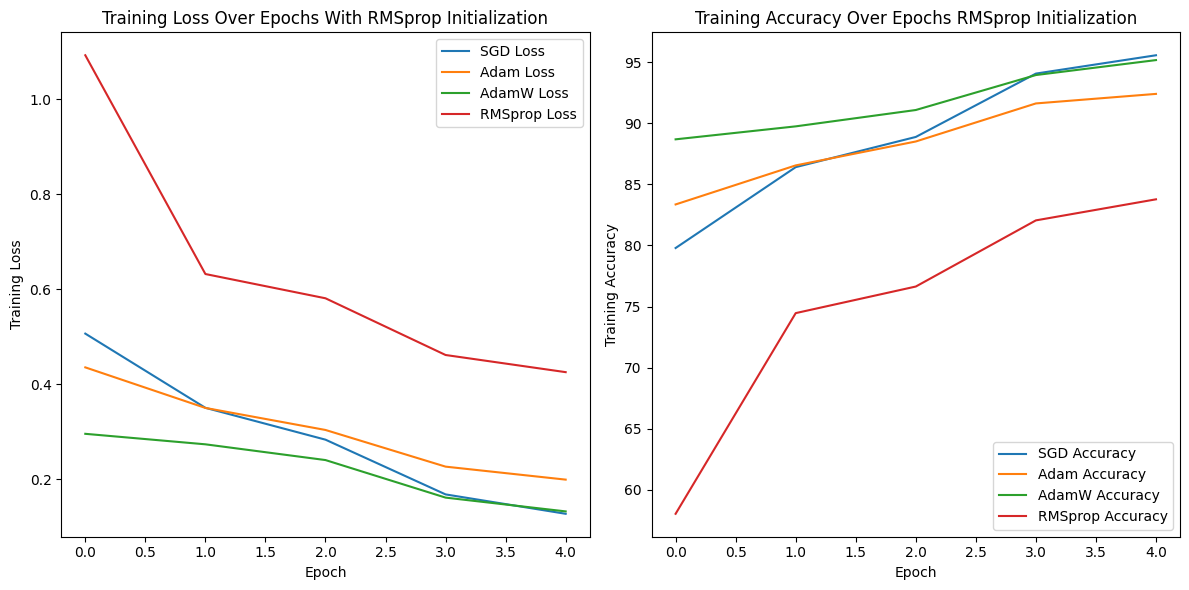

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for result in results:
    plt.plot(result['train_loss'], label=f"{result['optimizer']} Loss")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title(f"Training Loss Over Epochs With {result['optimizer']} Initialization")
plt.legend()

plt.subplot(1, 2, 2)
for result in results:
    plt.plot(result['train_accuracy'], label=f"{result['optimizer']} Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title(f"Training Accuracy Over Epochs {result['optimizer']} Initialization")
plt.legend()

plt.tight_layout()
plt.show()


## batchsize

In [45]:
batchsize = 32
trainLoader32 = DataLoader(trainData, batch_size=batchsize, shuffle=True)

batchsize = 64
trainLoader64 = DataLoader(trainData, batch_size=batchsize, shuffle=True)

In [46]:
modelBatchRes= ResNet(classes=3).to(device)
initializations = (modelBatchRes, 'lecun')
optimizer = optim.AdamW(modelBatchRes.parameters(), lr=0.001, weight_decay=0.01)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
StartTime32 = time.time()
trained_modelR32, train_lossR32, train_accR32 = train_model(modelBatchRes, trainLoader32, num_epochs=10, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
endTime32 = time.time()
print(f'batch size 32 trained in: {endTime32 - StartTime32:.2f} seconds')

# print(batch size 32 trained in )
StartTime64 = time.time()
trained_modelR64, train_lossR64, train_accR64 = train_model(modelBatchRes, trainLoader64, num_epochs=10, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
endTime64 = time.time()
print(f'batch size 64 trained in: {endTime64 - StartTime64:.2f} seconds')


Epoch [1/10], Loss: 0.52, Accuracy: 79.91%, Epoch training time: 33.00 seconds
Epoch [2/10], Loss: 0.40, Accuracy: 84.69%, Epoch training time: 33.21 seconds
Epoch [3/10], Loss: 0.35, Accuracy: 86.28%, Epoch training time: 32.65 seconds
Epoch [4/10], Loss: 0.26, Accuracy: 90.29%, Epoch training time: 33.13 seconds
Epoch [5/10], Loss: 0.23, Accuracy: 91.11%, Epoch training time: 32.67 seconds
Epoch [6/10], Loss: 0.21, Accuracy: 92.06%, Epoch training time: 33.32 seconds
Epoch [7/10], Loss: 0.18, Accuracy: 93.45%, Epoch training time: 32.35 seconds
Epoch [8/10], Loss: 0.16, Accuracy: 93.88%, Epoch training time: 33.32 seconds
Epoch [9/10], Loss: 0.16, Accuracy: 94.16%, Epoch training time: 32.44 seconds
Epoch [10/10], Loss: 0.15, Accuracy: 94.26%, Epoch training time: 33.25 seconds
batch size 32 trained in: 329.33 seconds
Epoch [1/10], Loss: 0.14, Accuracy: 94.92%, Epoch training time: 29.10 seconds
Epoch [2/10], Loss: 0.14, Accuracy: 94.88%, Epoch training time: 28.60 seconds
Epoch [3/1

# logs


In [48]:
import os
import tensorflow as tf
from torch.utils.tensorboard import SummaryWriter
# writelogs = SummaryWriter('runs/part1_vgglogs')

logDir = '/kaggle/working/tensorboard_logs/part1_resentlogsFinal/'

if os.path.exists(logDir):
    import shutil
    print("Logs removed and new ones will be written.")
    shutil.rmtree(logDir)
os.makedirs(logDir, exist_ok=True)
writelogs = SummaryWriter(logDir)


In [49]:
modelFinalRes= ResNet(classes=3).to(device)
initializations = (modelFinalRes, 'lecun')
optimizer = optim.AdamW(modelFinalRes.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

# trained_model64, train_loss64, train_acc64 = train_model(modelBatch, trainLoader64, num_epochs=10, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
# endTime64 = time.time()
# print(f'batch size 64 trained in: {endTime64 - StartTime64:.2f} seconds')

bestModelRes, trainLossesBestRes, valLossesBestRes, trainAccuraciesBestRes, valAccuraciesBestRes= trainBestModel(modelFinalRes, trainLoaderFinalSet, valLoaderFinalSet, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, scheduler=scheduler, num_epochs = 30, patience=3, device=device)

cuda
Epoch [1/30], Train Loss: 0.5171, Train Accuracy: 0.7912, Val Loss: 0.4058, Val Accuracy: 0.8380
saving model at epoch 1
Epoch [2/30], Train Loss: 0.3553, Train Accuracy: 0.8586, Val Loss: 0.4322, Val Accuracy: 0.8280
Epoch [3/30], Train Loss: 0.2744, Train Accuracy: 0.8937, Val Loss: 0.3884, Val Accuracy: 0.8529
saving model at epoch 3
Epoch [4/30], Train Loss: 0.1433, Train Accuracy: 0.9489, Val Loss: 0.3778, Val Accuracy: 0.8647
saving model at epoch 4
Epoch [5/30], Train Loss: 0.0829, Train Accuracy: 0.9728, Val Loss: 0.4416, Val Accuracy: 0.8580
Epoch [6/30], Train Loss: 0.0548, Train Accuracy: 0.9834, Val Loss: 0.4948, Val Accuracy: 0.8571
Epoch [7/30], Train Loss: 0.0319, Train Accuracy: 0.9928, Val Loss: 0.5137, Val Accuracy: 0.8531
Early stopping at epoch 7


In [50]:
writelogs.close()

Test Loss: 0.4703, Test Accuracy: 0.8587
Precision: 0.8625, Recall: 0.8587, F1 Score: 0.8595


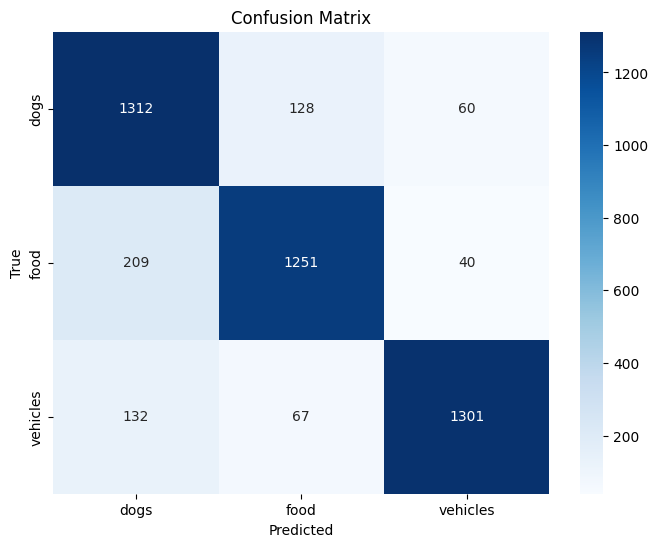

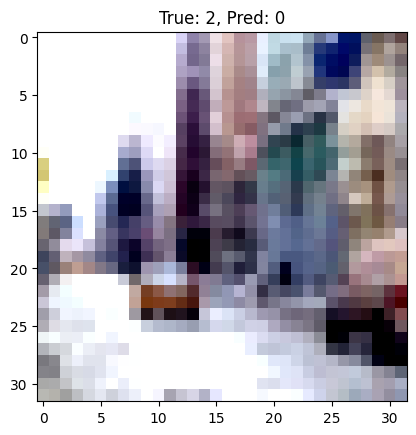

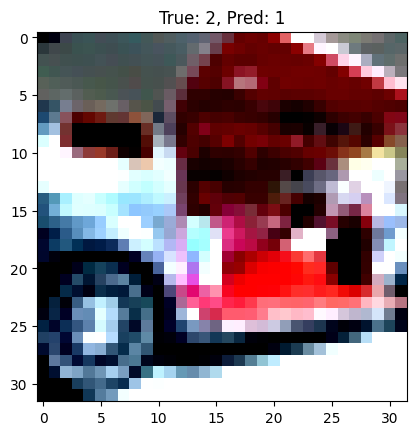

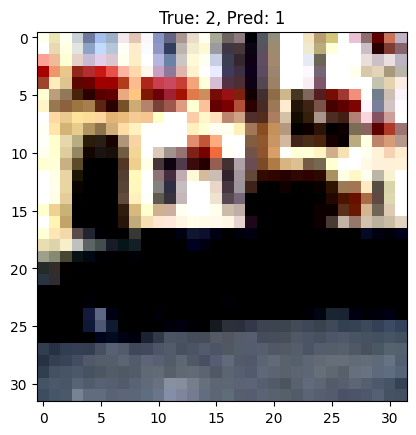

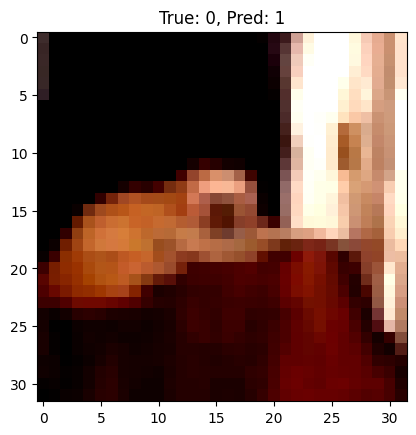

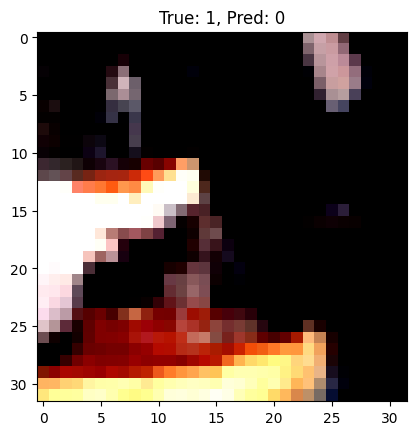

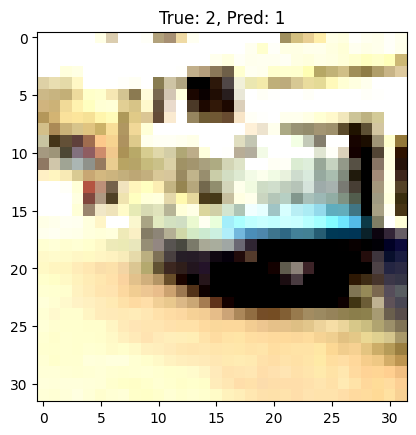

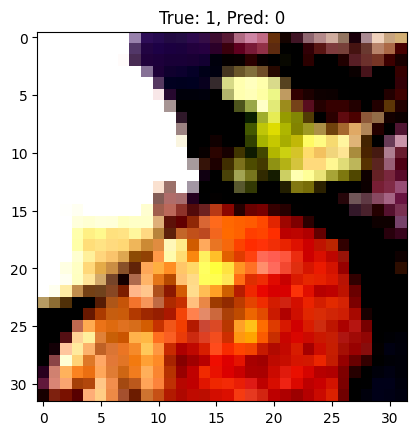

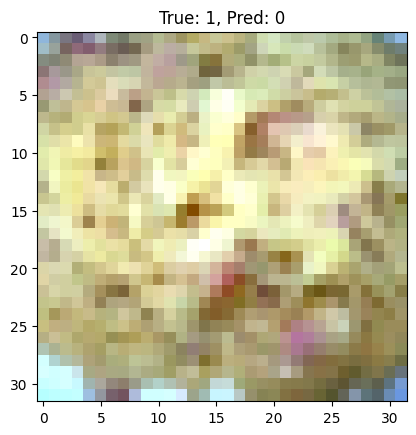

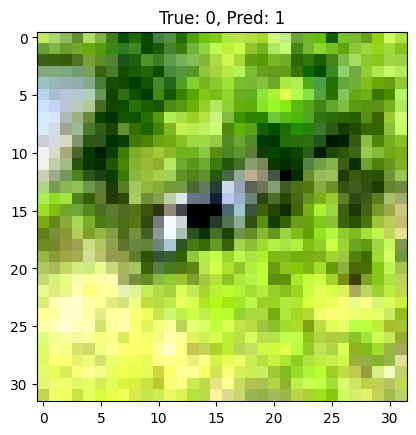

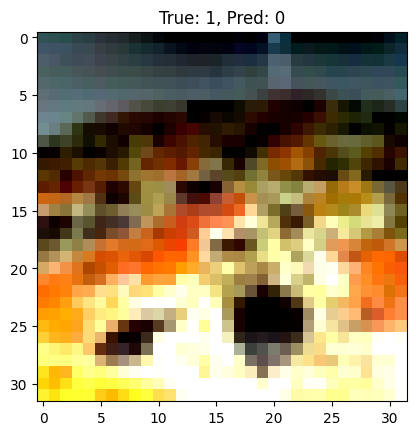

In [51]:
testLossRes, testAccuracyRes = test_model(bestModelRes, testLoaderFinalSet, nn.CrossEntropyLoss(), device,class_names )


[0.4702913547065896, 0.4702913547065896, 0.4702913547065896, 0.4702913547065896, 0.4702913547065896, 0.4702913547065896, 0.4702913547065896]


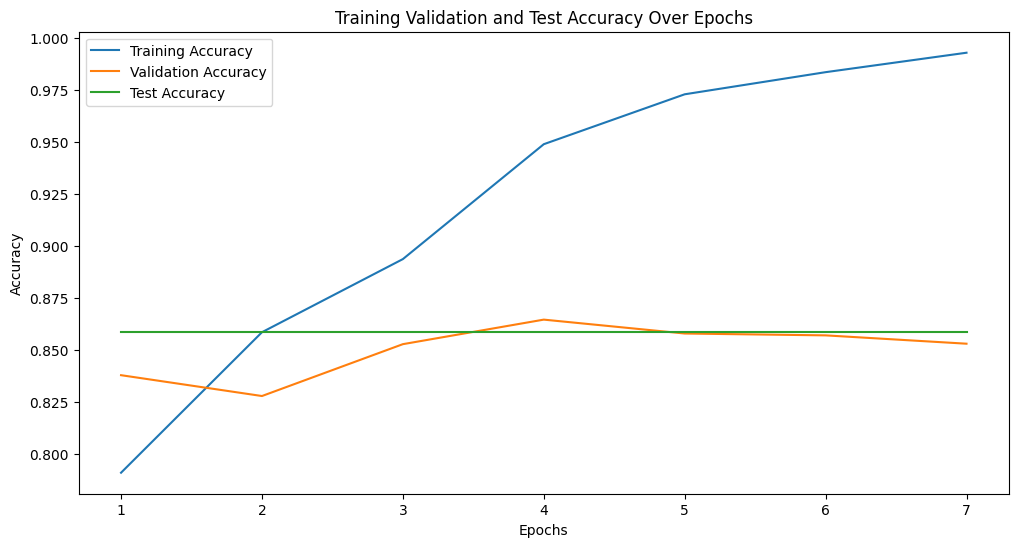

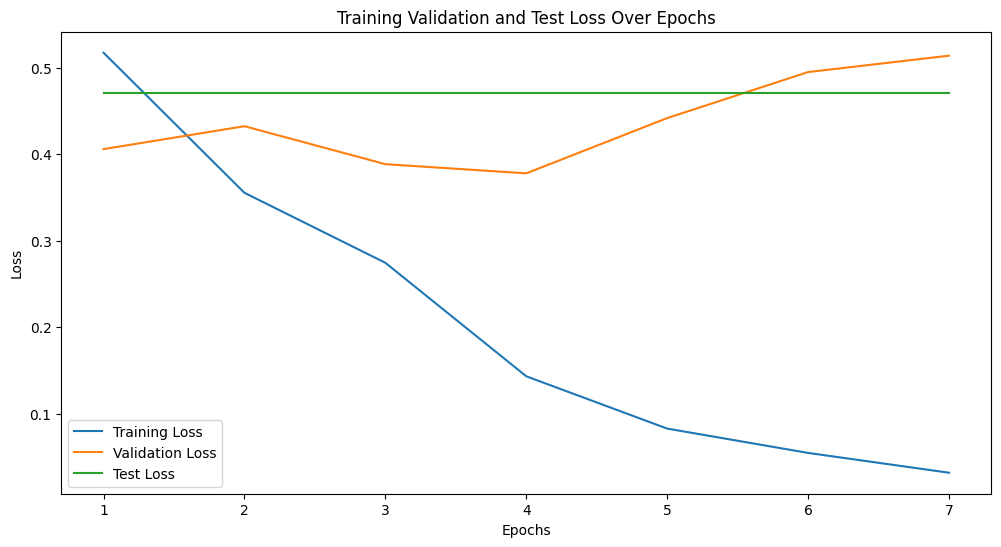

In [52]:
plot_metrics(trainAccuraciesBestRes, valAccuraciesBestRes,testAccuracyRes,trainLossesBestRes, valLossesBestRes,testLossRes)

# tensorboard log screenshots for ResNet

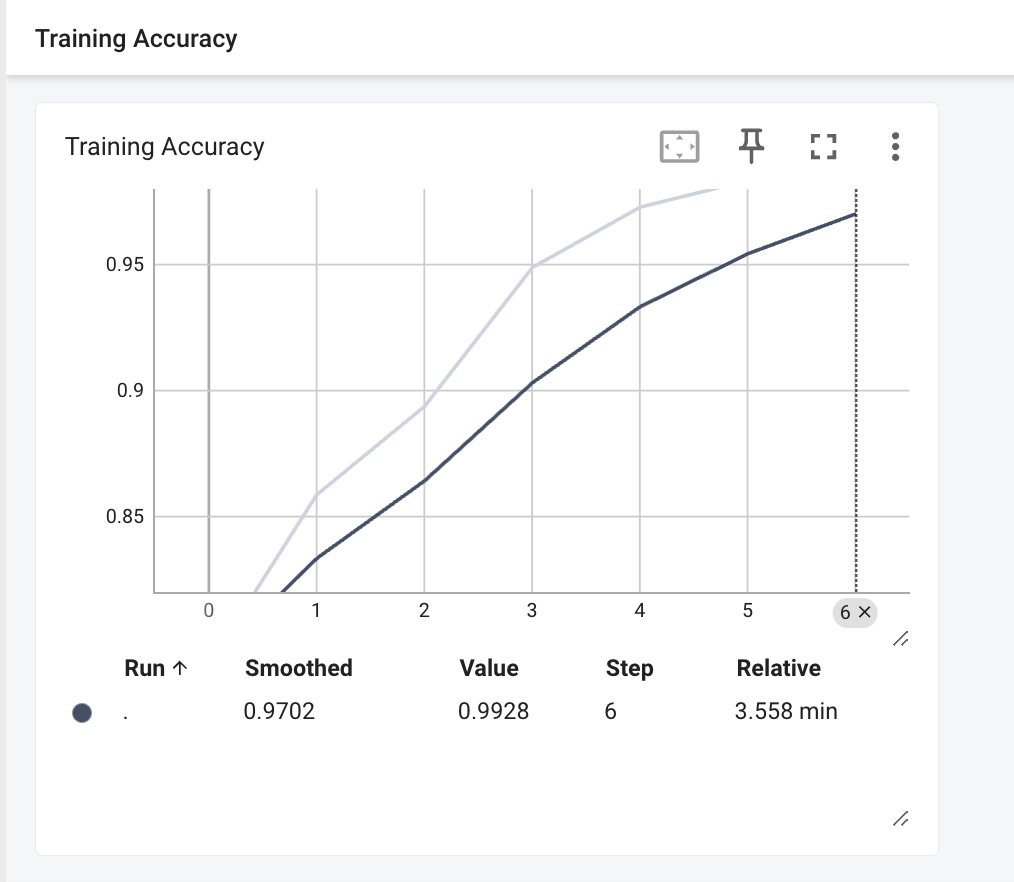
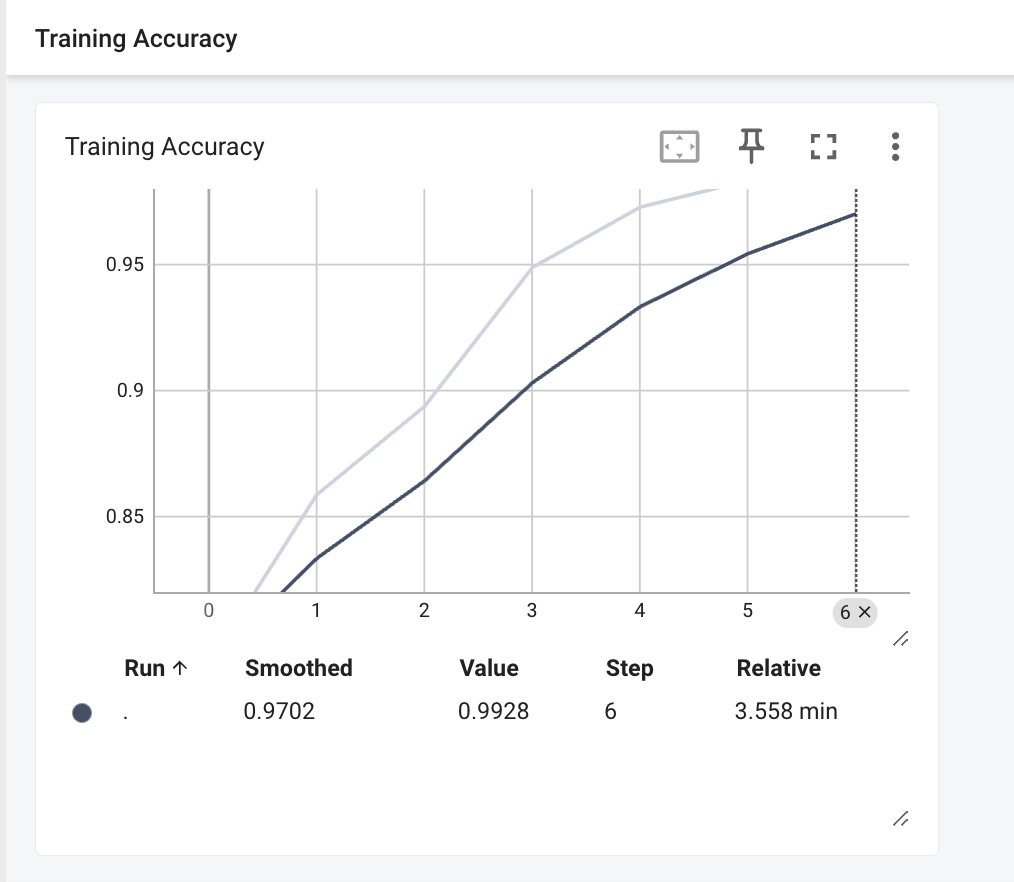

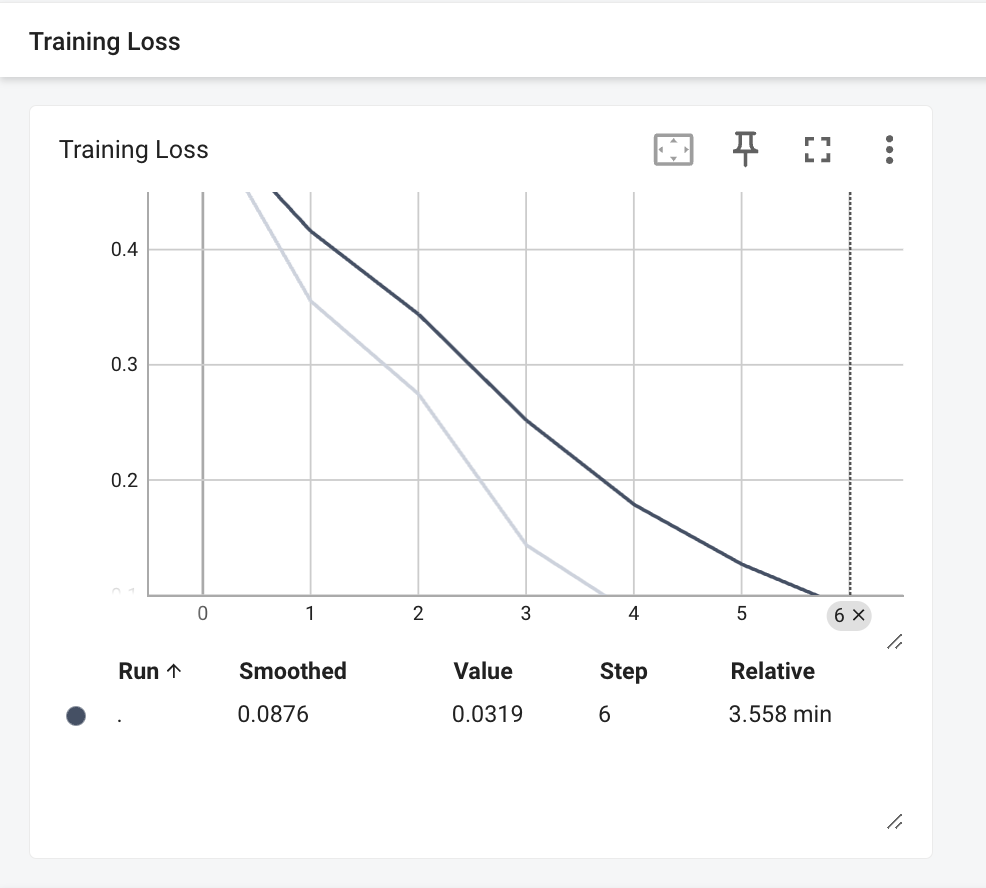

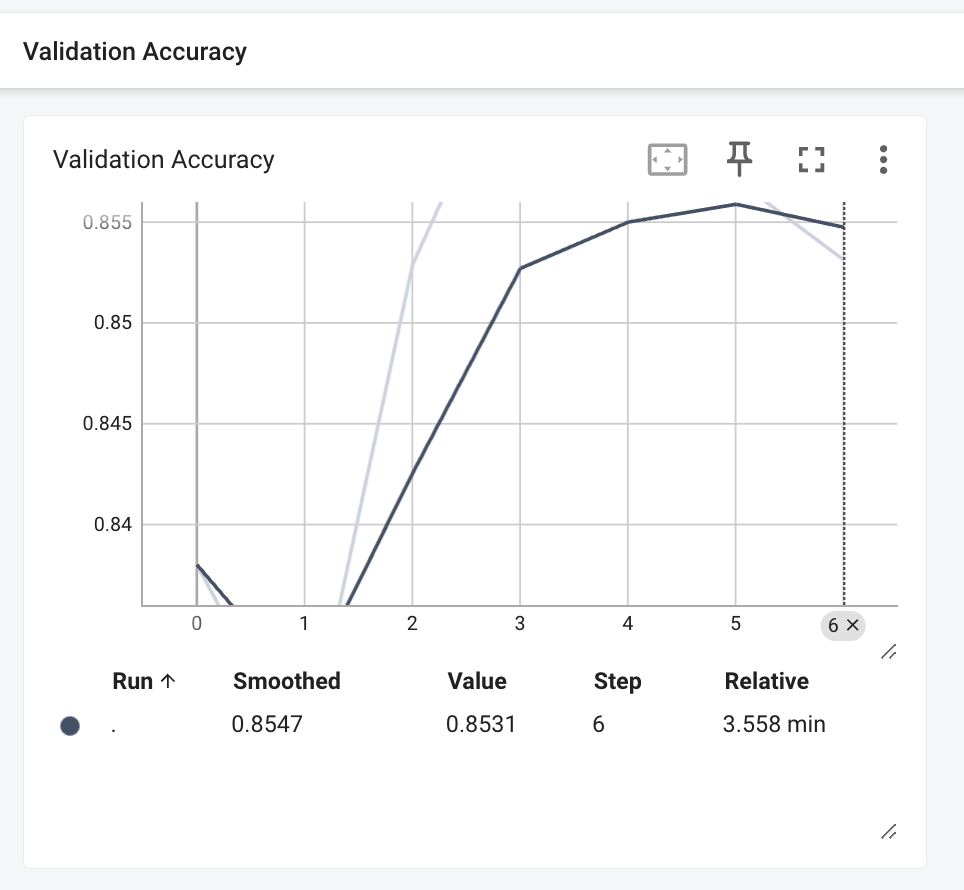

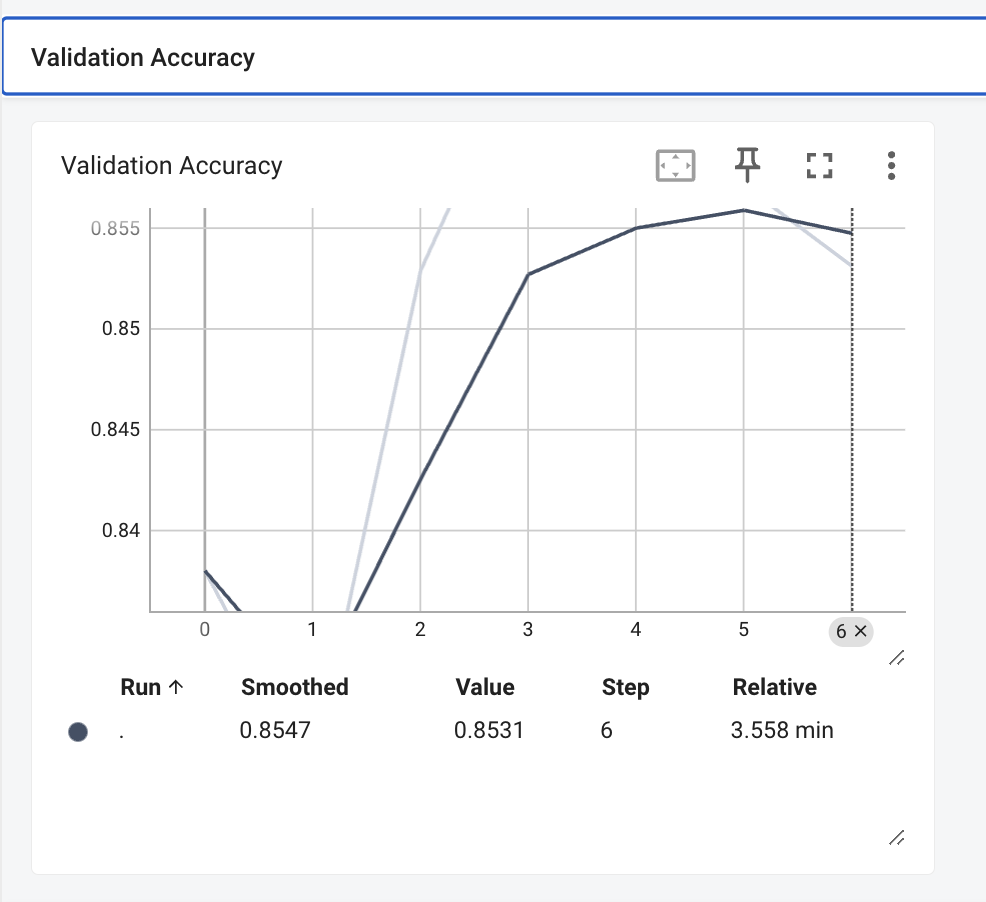

## comparison between Resnet and VGG best models

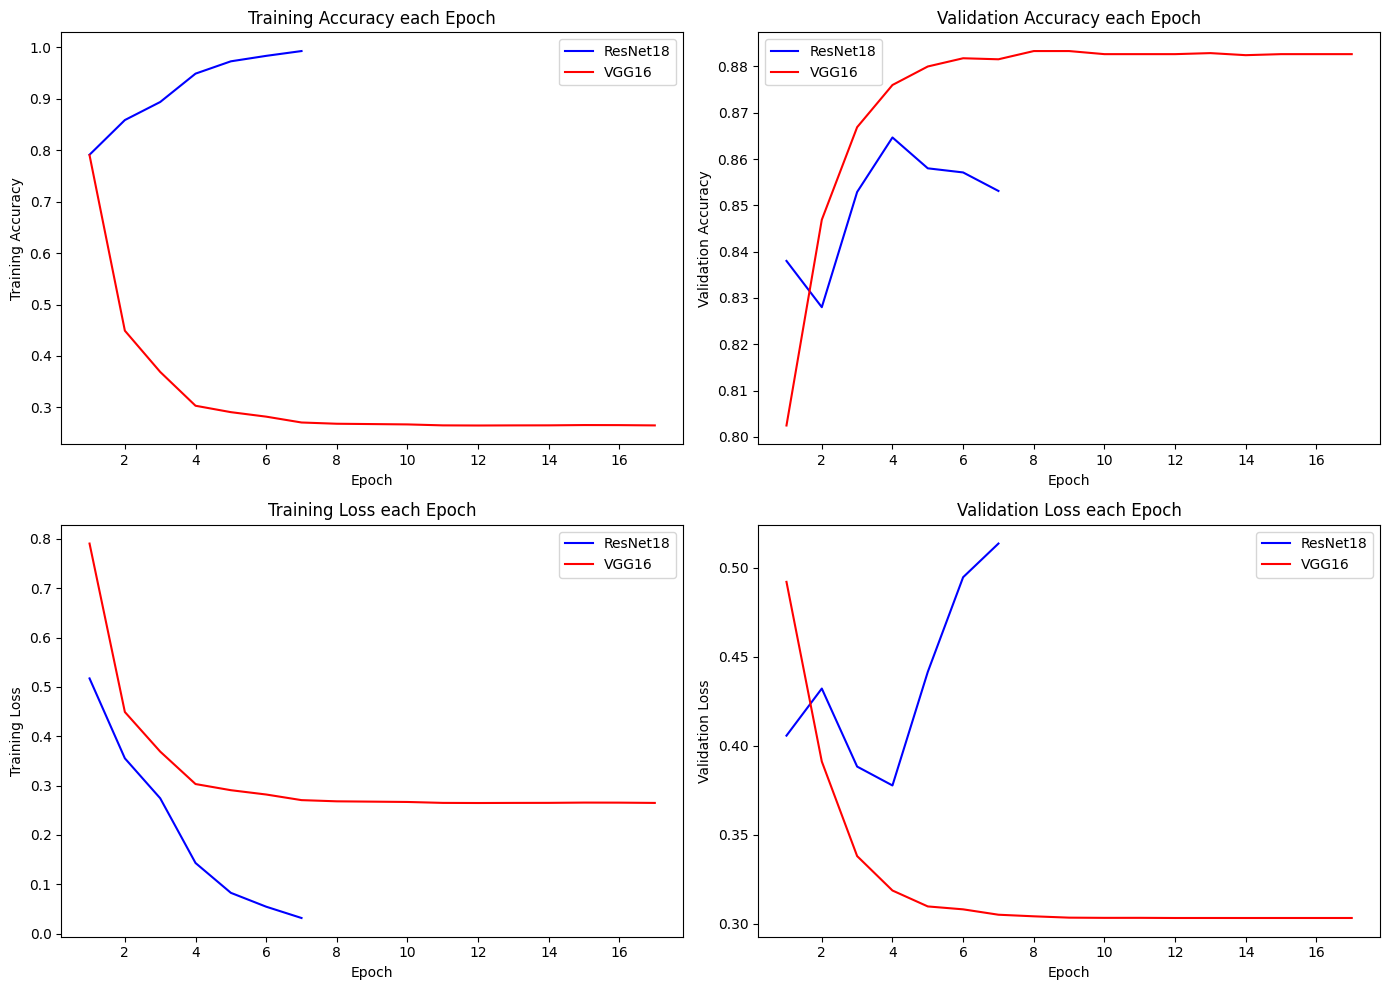

In [78]:
epochsRes = range(1, 8)
epochsVgg = range(1, 18)
plt.figure(figsize=(14, 10))

#training acc
plt.subplot(2, 2, 1)
plt.plot(epochsRes, trainAccuraciesBestRes, label='ResNet18', color='b', linestyle='-')
plt.plot(epochsVgg, trainLossesBest, label='VGG16', color='r', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy each Epoch')
plt.legend()

#val acc
plt.subplot(2, 2, 2)
plt.plot(epochsRes, valAccuraciesBestRes, label='ResNet18', color='b', linestyle='-')
plt.plot(epochsVgg, valAccuraciesBest, label='VGG16', color='r', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy each Epoch')
plt.legend()

#train loss
plt.subplot(2, 2, 3)
plt.plot(epochsRes, trainLossesBestRes, label='ResNet18', color='b', linestyle='-')
plt.plot(epochsVgg, trainLossesBest, label='VGG16', color='r', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss each Epoch')
plt.legend()

#val loss
plt.subplot(2, 2, 4)
plt.plot(epochsRes, valLossesBestRes, label='ResNet18', color='b', linestyle='-')
plt.plot(epochsVgg, valLossesBest, label='VGG16', color='r', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss each Epoch')
plt.legend()

plt.tight_layout()
plt.show()
